# Chicago Taxi Trips in Year 2022
#### Copyright © 2024 Danny Ng

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%config InlineBackend.figure_format='retina'

# Step 1: Read the data

In [2]:
df = pd.read_csv('chicago_taxi_trip_sample.csv')

In [3]:
df.shape

(100000, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   trip_id       100000 non-null  object 
 1   taxi_id       100000 non-null  object 
 2   month         100000 non-null  int64  
 3   day_of_week   100000 non-null  int64  
 4   hour          100000 non-null  int64  
 5   pickup_area   100000 non-null  object 
 6   dropoff_area  100000 non-null  object 
 7   trip_miles    100000 non-null  float64
 8   trip_seconds  100000 non-null  int64  
 9   fare          100000 non-null  float64
 10  tips          100000 non-null  float64
 11  tips_percent  100000 non-null  float64
 12  tolls         100000 non-null  float64
 13  extras        100000 non-null  float64
 14  trip_total    100000 non-null  float64
 15  payment_type  100000 non-null  object 
 16  company       100000 non-null  object 
dtypes: float64(7), int64(4), object(6)
memory usage: 

In [5]:
df.head(2)

trip_id taxi_id  month  day_of_week  hour pickup_area dropoff_area  \
0  259f9c40ef9  f9bc93      1            5     0       Other        Other   
1  0f61207c6d8  271cde      1            5     0    Downtown        Other   

   trip_miles  trip_seconds  fare  tips  tips_percent  tolls  extras  \
0        0.35           151  4.25   0.0           0.0    0.0     1.0   
1        0.53           918  8.50   0.0           0.0    0.0     0.0   

   trip_total payment_type       company  
0        5.25         Cash  City Service  
1        8.50         Cash      Sun Taxi

In [6]:
df.tail(2)

trip_id taxi_id  month  day_of_week  hour pickup_area dropoff_area  \
99998  ed987453c4c  a48535     12            5    23    Downtown        Other   
99999  6f2cde448af  361804     12            5    23       Other        Other   

       trip_miles  trip_seconds  fare  tips  tips_percent  tolls  extras  \
99998        4.09           804  14.0   0.0           0.0    0.0     1.0   
99999       13.10          1080  33.0   0.0           0.0    0.0     0.0   

       trip_total payment_type                    company  
99998        15.0         Cash               City Service  
99999        33.0        Other  Taxi Affiliation Services

In [7]:
df.describe().transpose().astype({'count': int}) # Only numerical columns

count         mean         std   min    25%      50%      75%  \
month         100000     6.936080    3.229650  1.00    4.0    7.000    10.00   
day_of_week   100000     2.882130    1.899382  0.00    1.0    3.000     4.00   
hour          100000    13.862130    5.221752  0.00   10.0   14.000    18.00   
trip_miles    100000     6.121182    6.374934  0.01    1.2    2.900    10.60   
trip_seconds  100000  1156.478920  905.061445  1.00  489.0  869.000  1585.00   
fare          100000    20.141239   14.962318  3.25    8.0   13.250    30.75   
tips          100000     2.511505    3.578416  0.00    0.0    1.000     3.39   
tips_percent  100000     0.133331    0.178893  0.00    0.0    0.062     0.23   
tolls         100000     0.001443    0.075218  0.00    0.0    0.000     0.00   
extras        100000     1.067526    1.897453  0.00    0.0    0.000     1.00   
trip_total    100000    23.883756   18.307585  3.25   10.0   15.900    32.75   

                   max  
month           12.000  
day_of_week      6.000  
hour            23.000  
trip_miles      83.000  
trip_seconds  7197.000  
fare           187.250  
tips            50.000  
tips_percent    11.111  
tolls            7.000  
extras          20.000  
trip_total     187.250

In [8]:
df.describe(include=object).transpose() # Only non-numerical columns

count  unique          top   freq
trip_id       100000  100000  259f9c40ef9      1
taxi_id       100000    2736       8da9e1    175
pickup_area   100000       4     Downtown  48862
dropoff_area  100000       4        Other  47745
payment_type  100000       3  Credit Card  38222
company       100000      28    Flash Cab  21272

# Step 2: Define business problem

#### Business Problem

> The Chicago Department of Transportation is interested in traffic patterns.  In particular, they want to understand how Chicago taxi trip duration is related to other factors of the trip.

#### Task

> Build a linear regression model using historical Chicago taxi trip data from year 2022 with `trip_seconds` as the response variable and other useful information as explanatory variables.

#### Some Considerations

- **Easy or difficulty task?**
    - Intuitively, `trip_miles` or `fare` are likely the most predictive / useful explanatory variable with a strong linear relationship.
    - Does the linear regression model predicts more accurately for some part of the data?
- **Overfitting**
    - If `trip_id` is used as an explanatory variable, then it would surely exhaust the number of degrees of freedom of the model and yield 0 residual error i.e. overfit.
- **Feature engineering**
    - Perform some feature engineering e.g. additional explanatory variables (such as month of year, day of week, hour of day, specific special dates) derived from `trip_start_time`, categorical variables for selected pick-up or drop-off locations, `tips` percentage, indicator variable for presence of `tolls`.
    - Perform variable transformation on some quantitative variables might strengthen the linear relationship (from non-linear).
- **[Multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity)**
    - Some explanatory variables might be highly correlated  e.g. `trip_miles`, `fare` (and etc summation), `trip_total`, distance derived from pick-up vs drop-off locations, or even `payment_type`.  This can affect the explainability of the model.
- **Others**
    - Is (popular) `taxi_id` useful or not?  Any anomaly or interesting behavior for specific taxi cab?
    - Any negative predicted `trip_seconds` value?

# Step 3: Do feature engineering
- See `chicago_taxi_trip_sample.ipynb`

# Step 4: Exploratory data analysis and visualization

In [9]:
# Correlation matrix of numerical variables
numerical_cols = ['trip_seconds', 'trip_miles', 'fare', 'tips', 'tolls', 'extras', 'trip_total', 'tips_percent']
C = df[numerical_cols].corr()

C

trip_seconds  trip_miles      fare      tips     tolls  \
trip_seconds      1.000000    0.731877  0.824167  0.423448  0.019853   
trip_miles        0.731877    1.000000  0.903163  0.508655  0.023787   
fare              0.824167    0.903163  1.000000  0.529455  0.025134   
tips              0.423448    0.508655  0.529455  1.000000  0.019615   
tolls             0.019853    0.023787  0.025134  0.019615  1.000000   
extras            0.426638    0.508376  0.521486  0.491807 -0.002456   
trip_total        0.801559    0.892731  0.976383  0.684750  0.028372   
tips_percent     -0.076842   -0.042703 -0.064983  0.582665  0.002597   

                extras  trip_total  tips_percent  
trip_seconds  0.426638    0.801559     -0.076842  
trip_miles    0.508376    0.892731     -0.042703  
fare          0.521486    0.976383     -0.064983  
tips          0.491807    0.684750      0.582665  
tolls        -0.002456    0.028372      0.002597  
extras        1.000000    0.628575      0.111505  
trip_total    0.628575    1.000000      0.078108  
tips_percent  0.111505    0.078108      1.000000

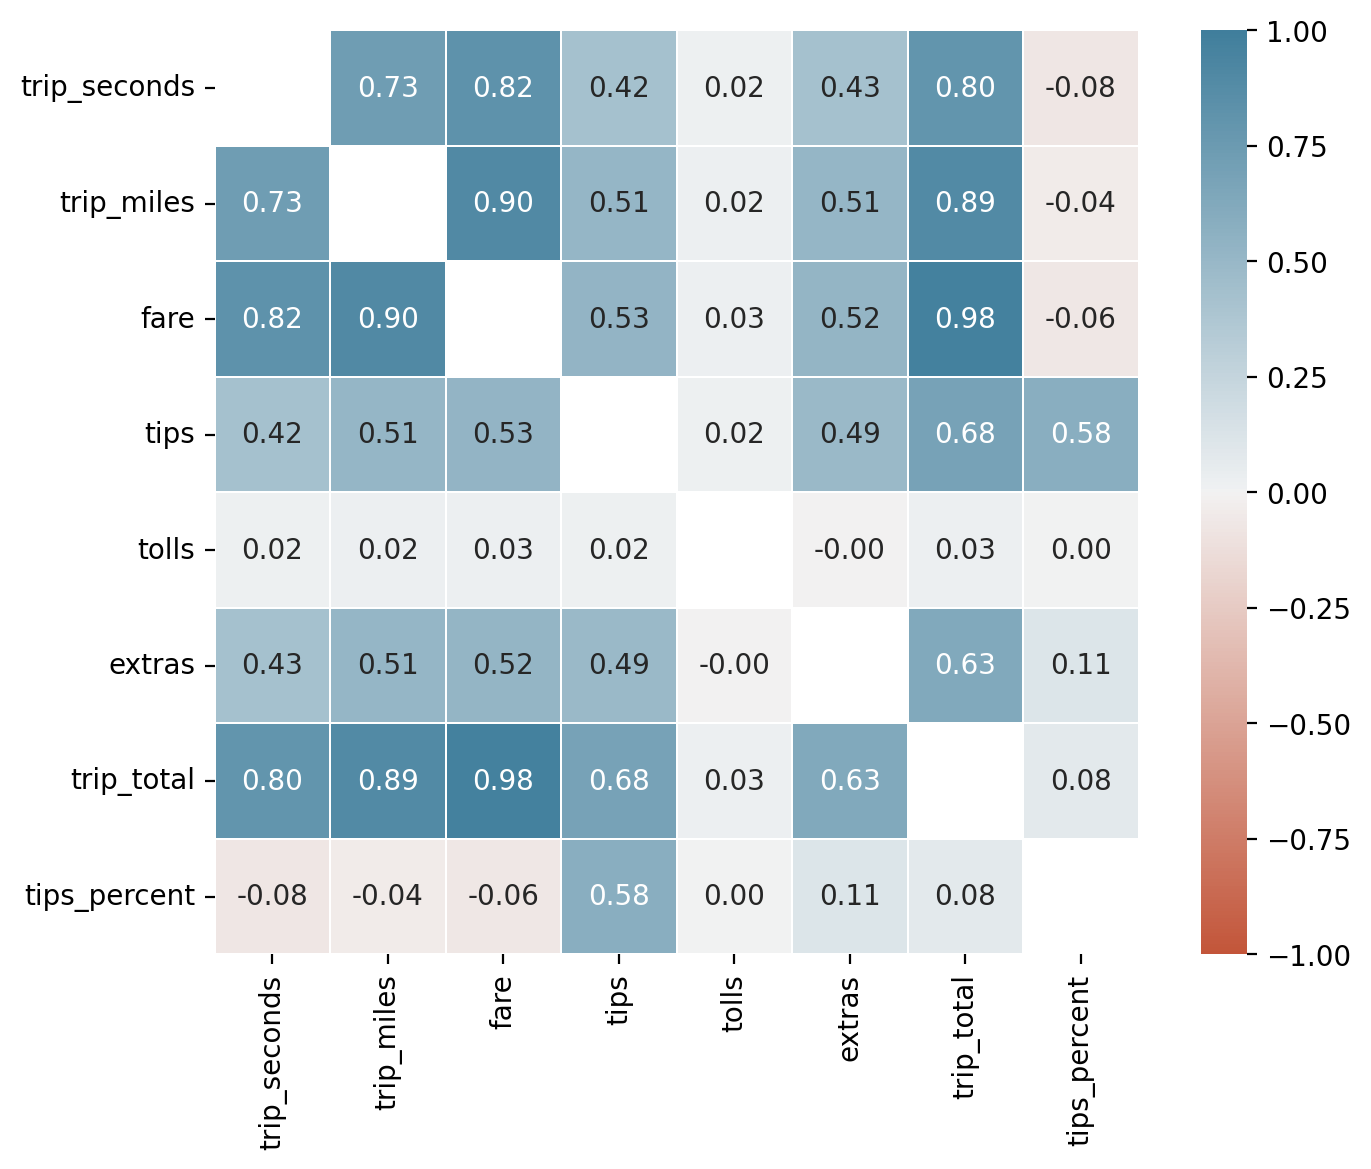

In [10]:
# Visualize correlation matrix as heat map
fig = plt.figure(figsize=(8, 6))
sns.heatmap(C, vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 230, as_cmap=True), annot=True, fmt='.2f',
            linewidths=0.1, square=True, mask=np.identity(len(numerical_cols), dtype=bool), ax=fig.gca());

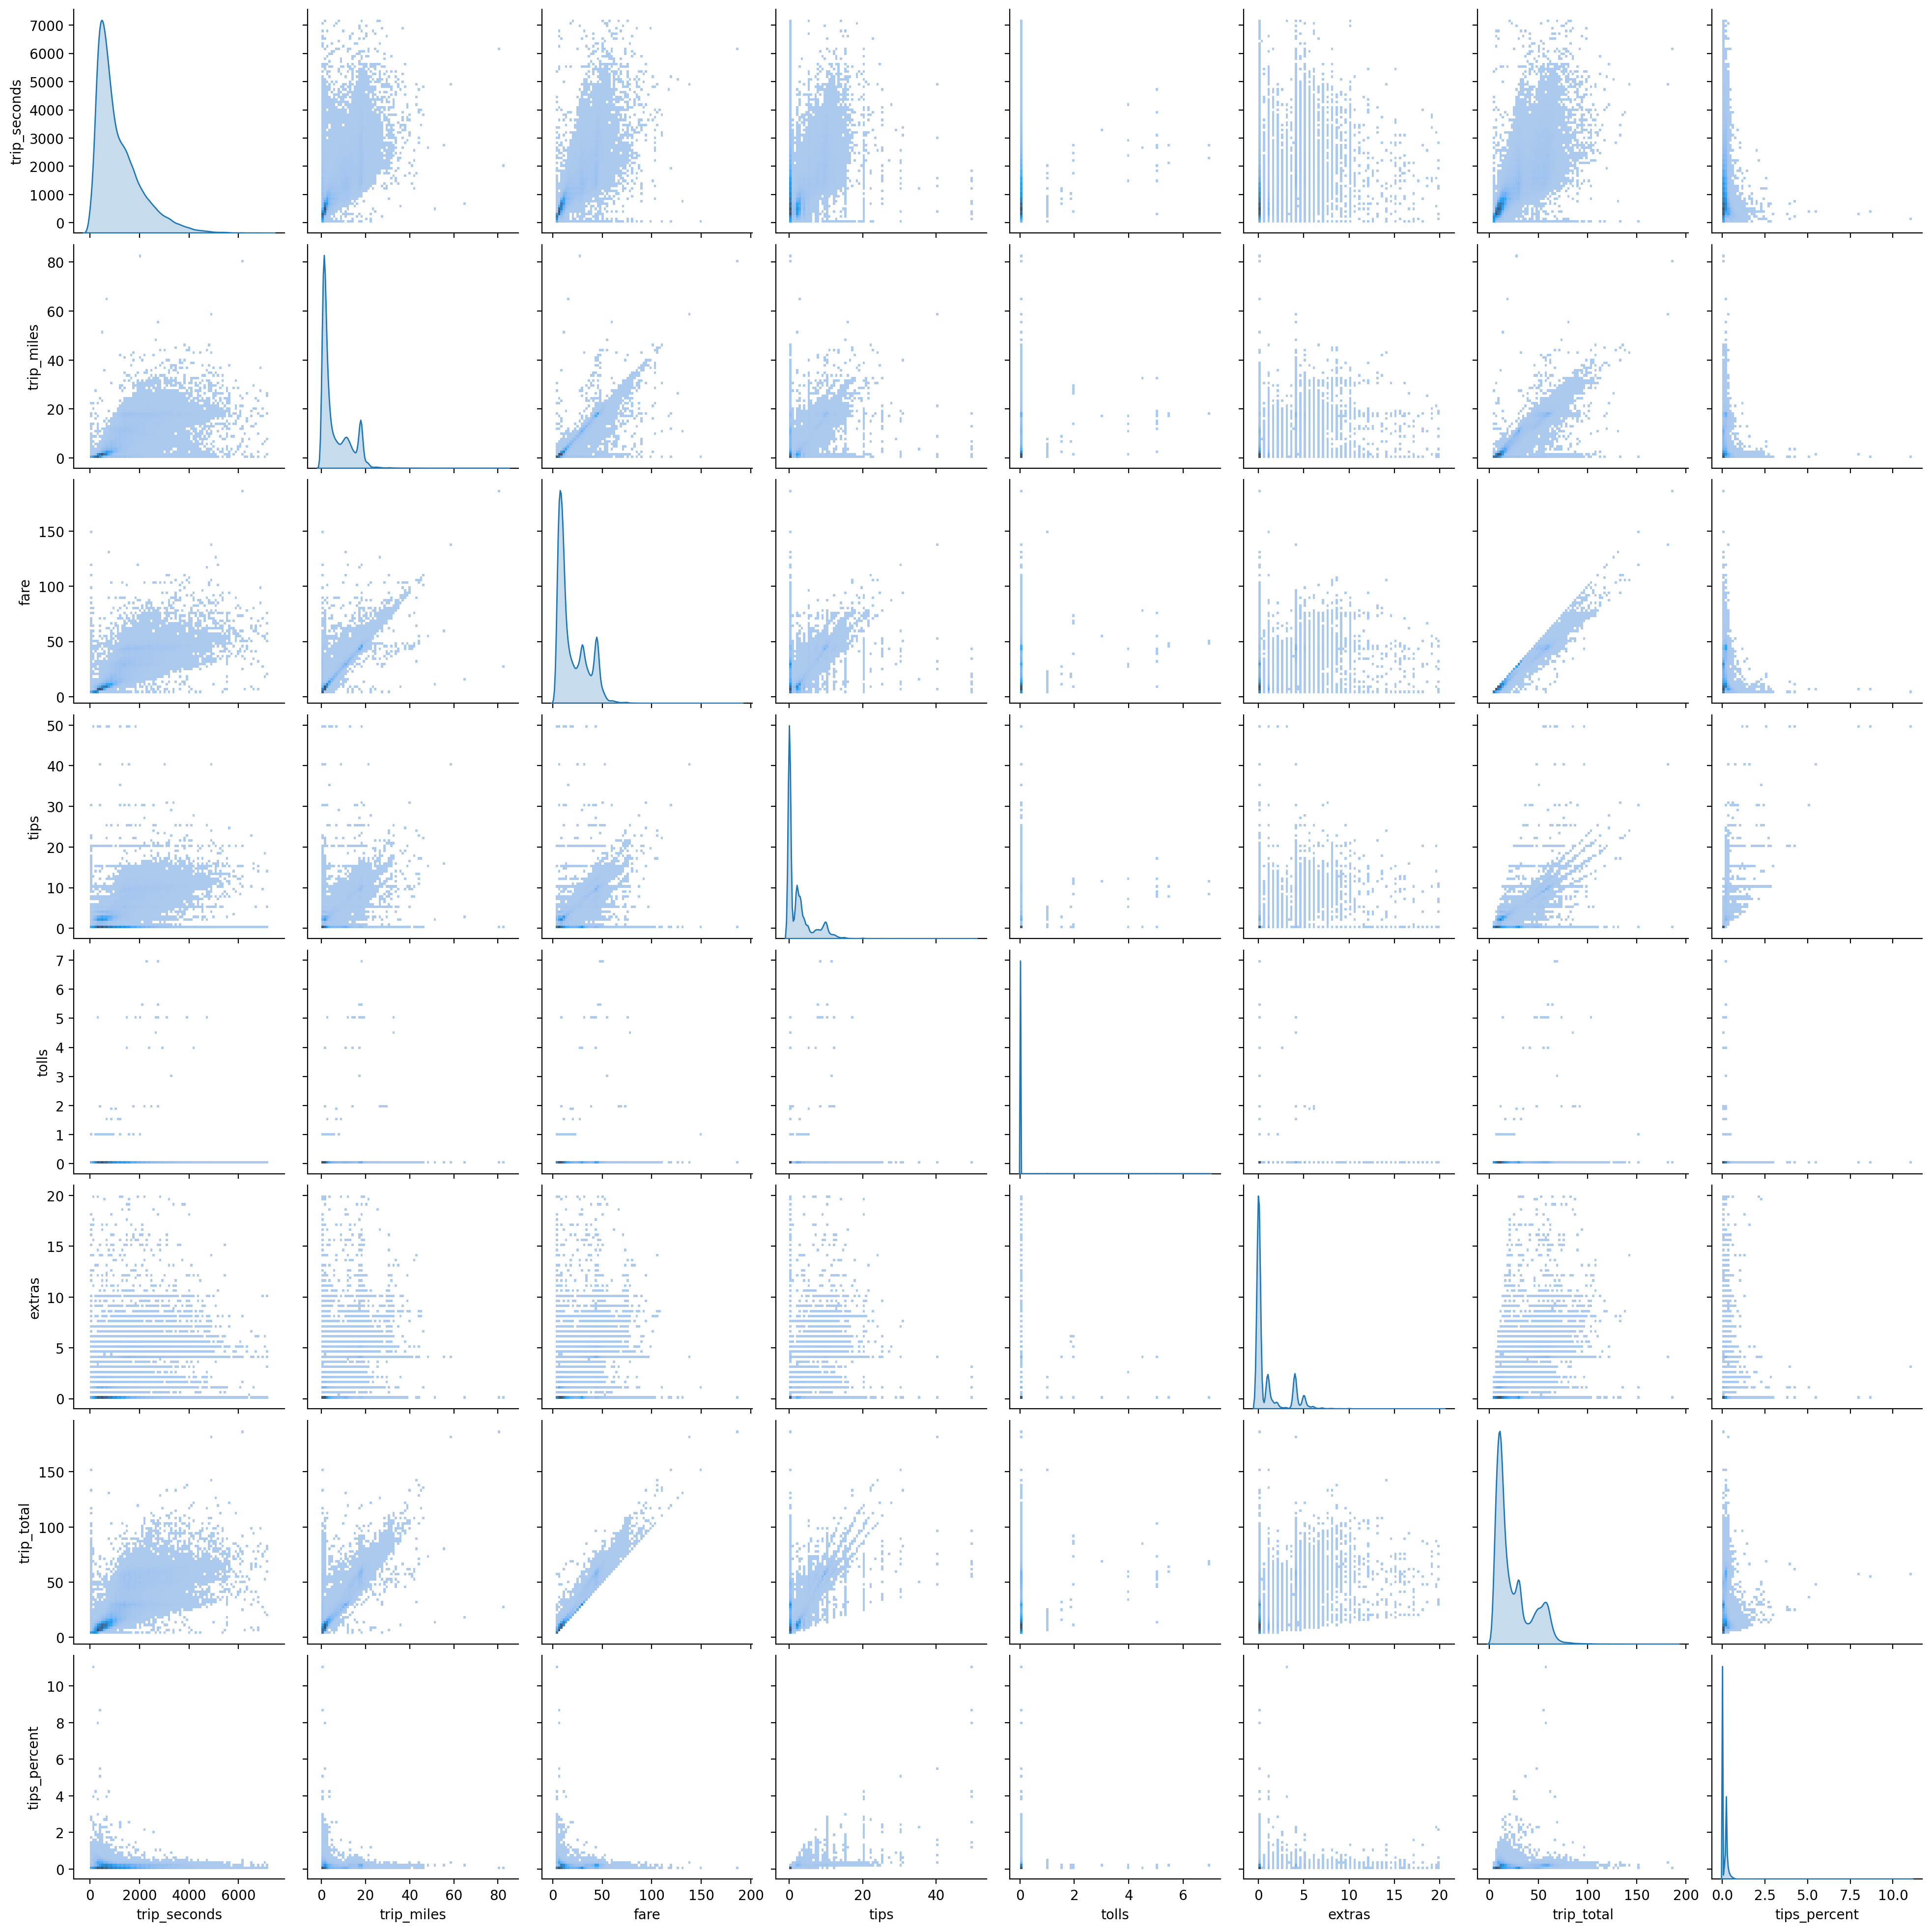

In [11]:
# Pair plot of numerical variables
sns.pairplot(df, vars=numerical_cols, kind='hist', diag_kind='kde', plot_kws={'bins': 80});

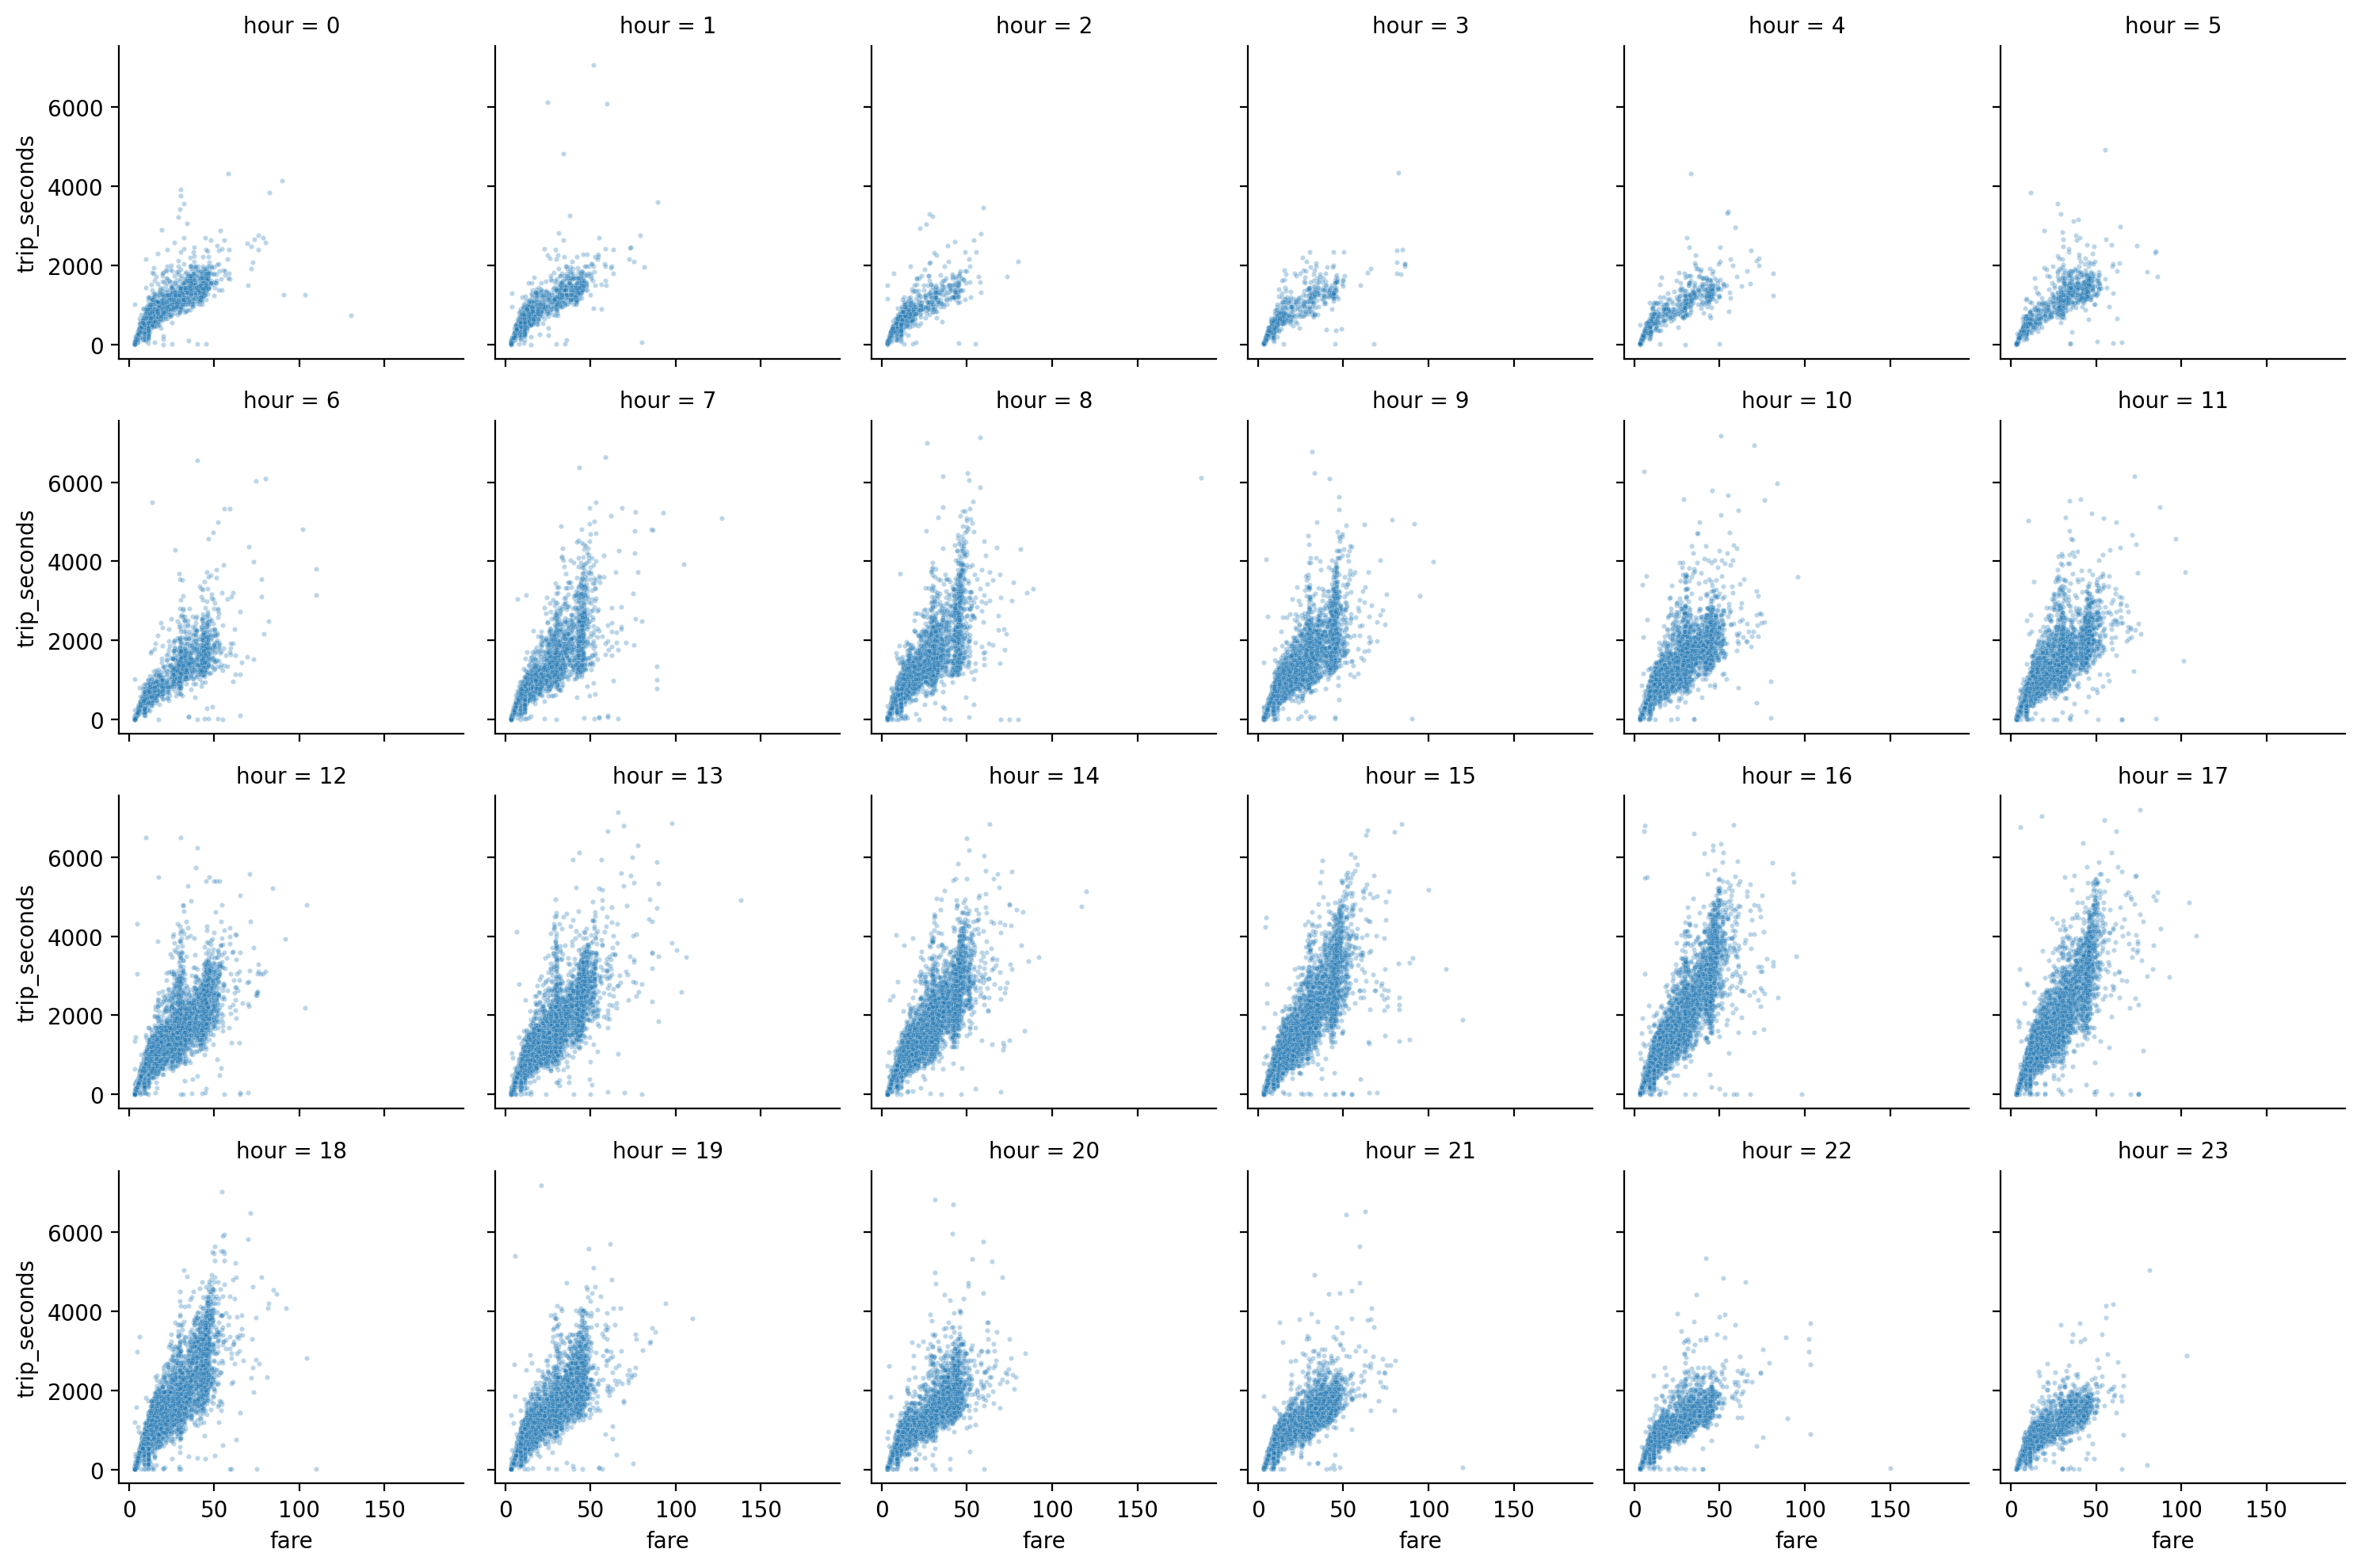

In [12]:
sns.relplot(df, x='fare', y='trip_seconds', col='hour', col_wrap=6, height=2.5, alpha=0.3, s=5);

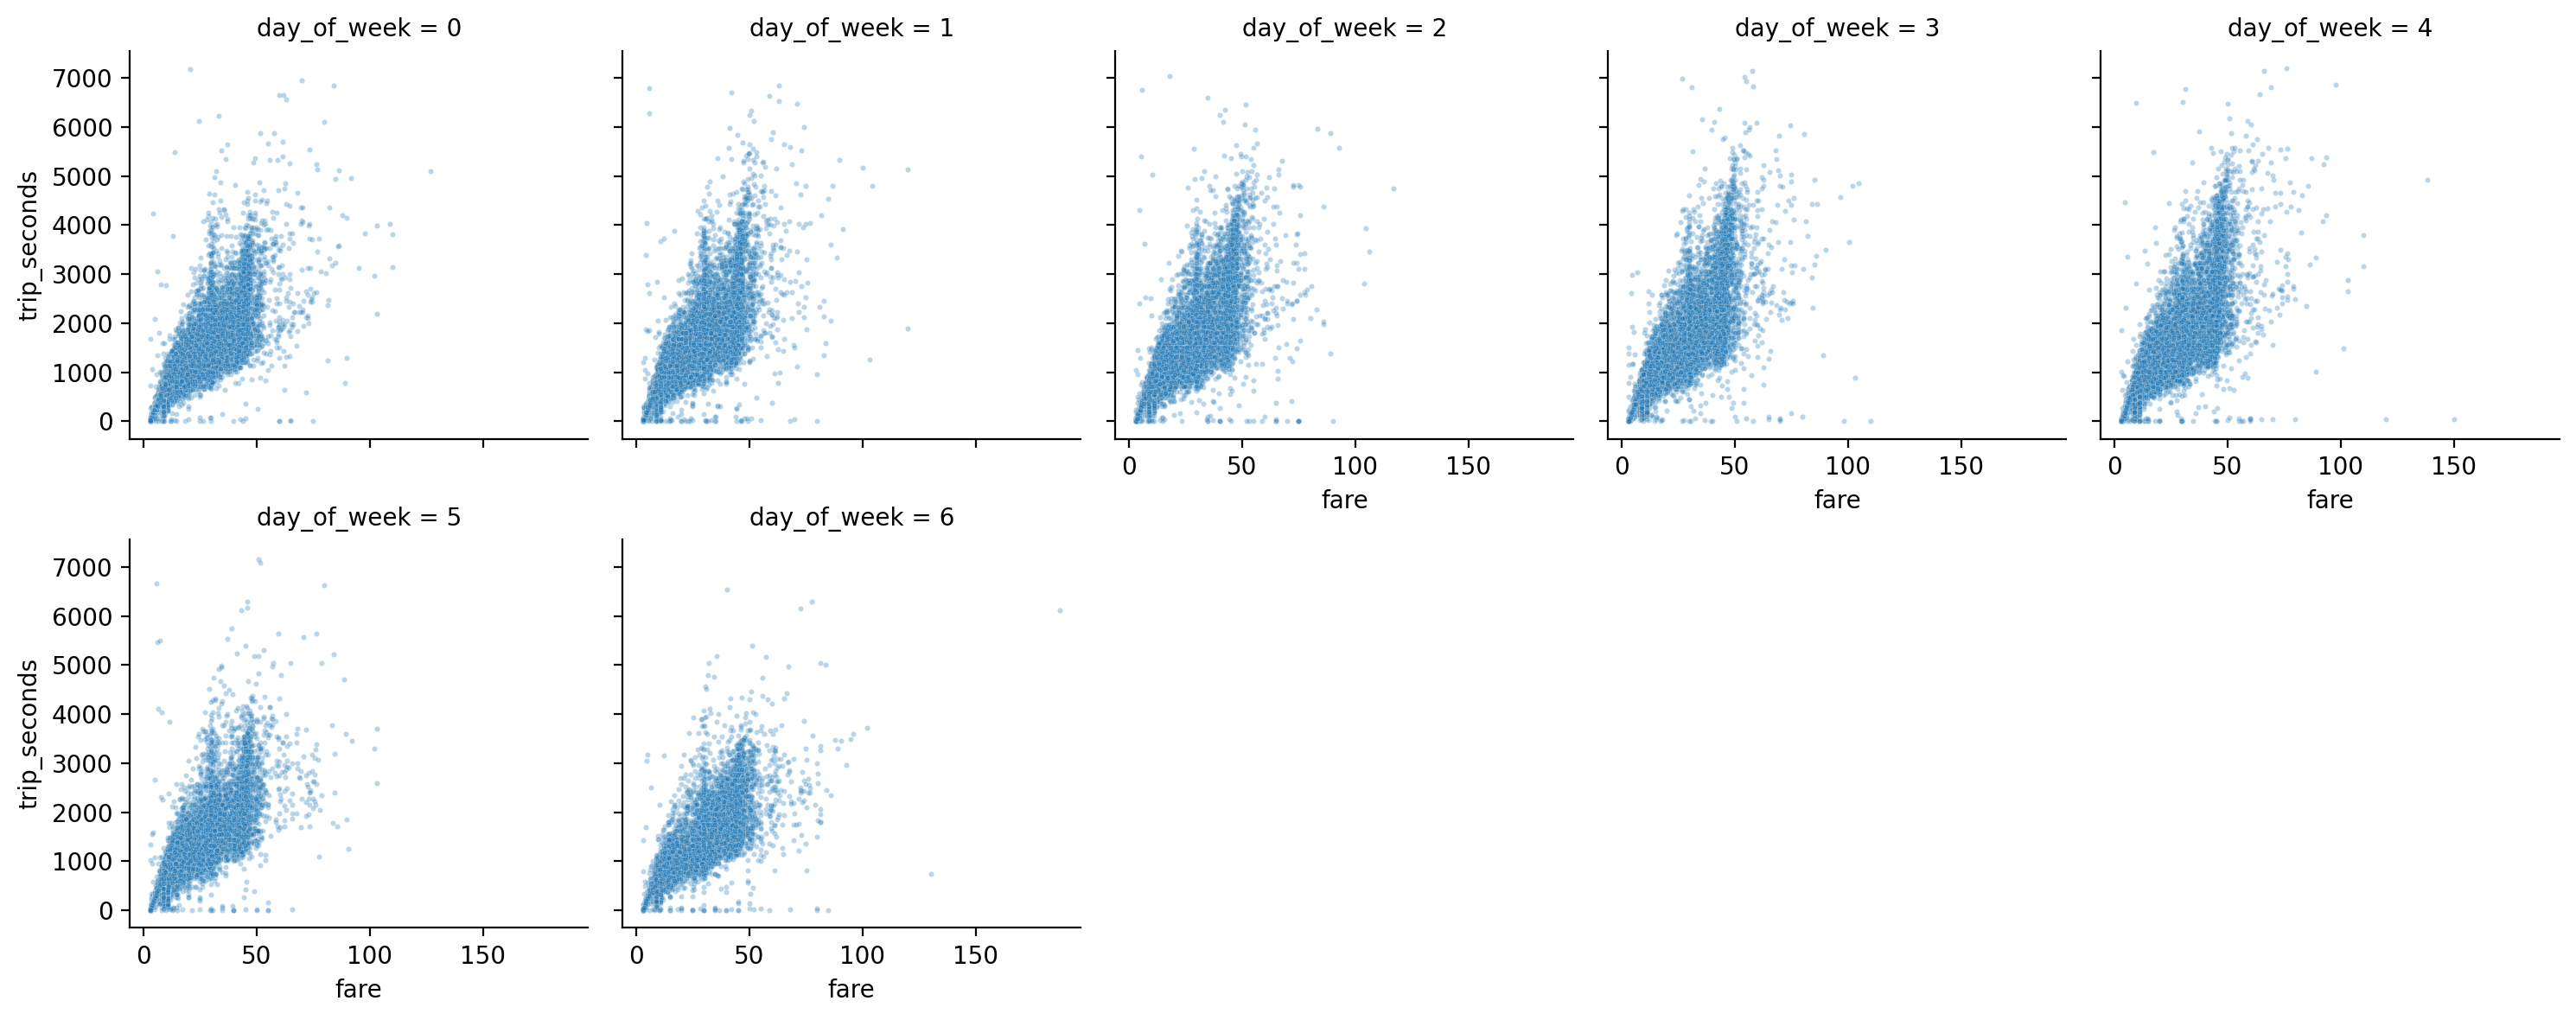

In [13]:
sns.relplot(df, x='fare', y='trip_seconds', col='day_of_week', col_wrap=5, height=3, alpha=0.3, s=5);

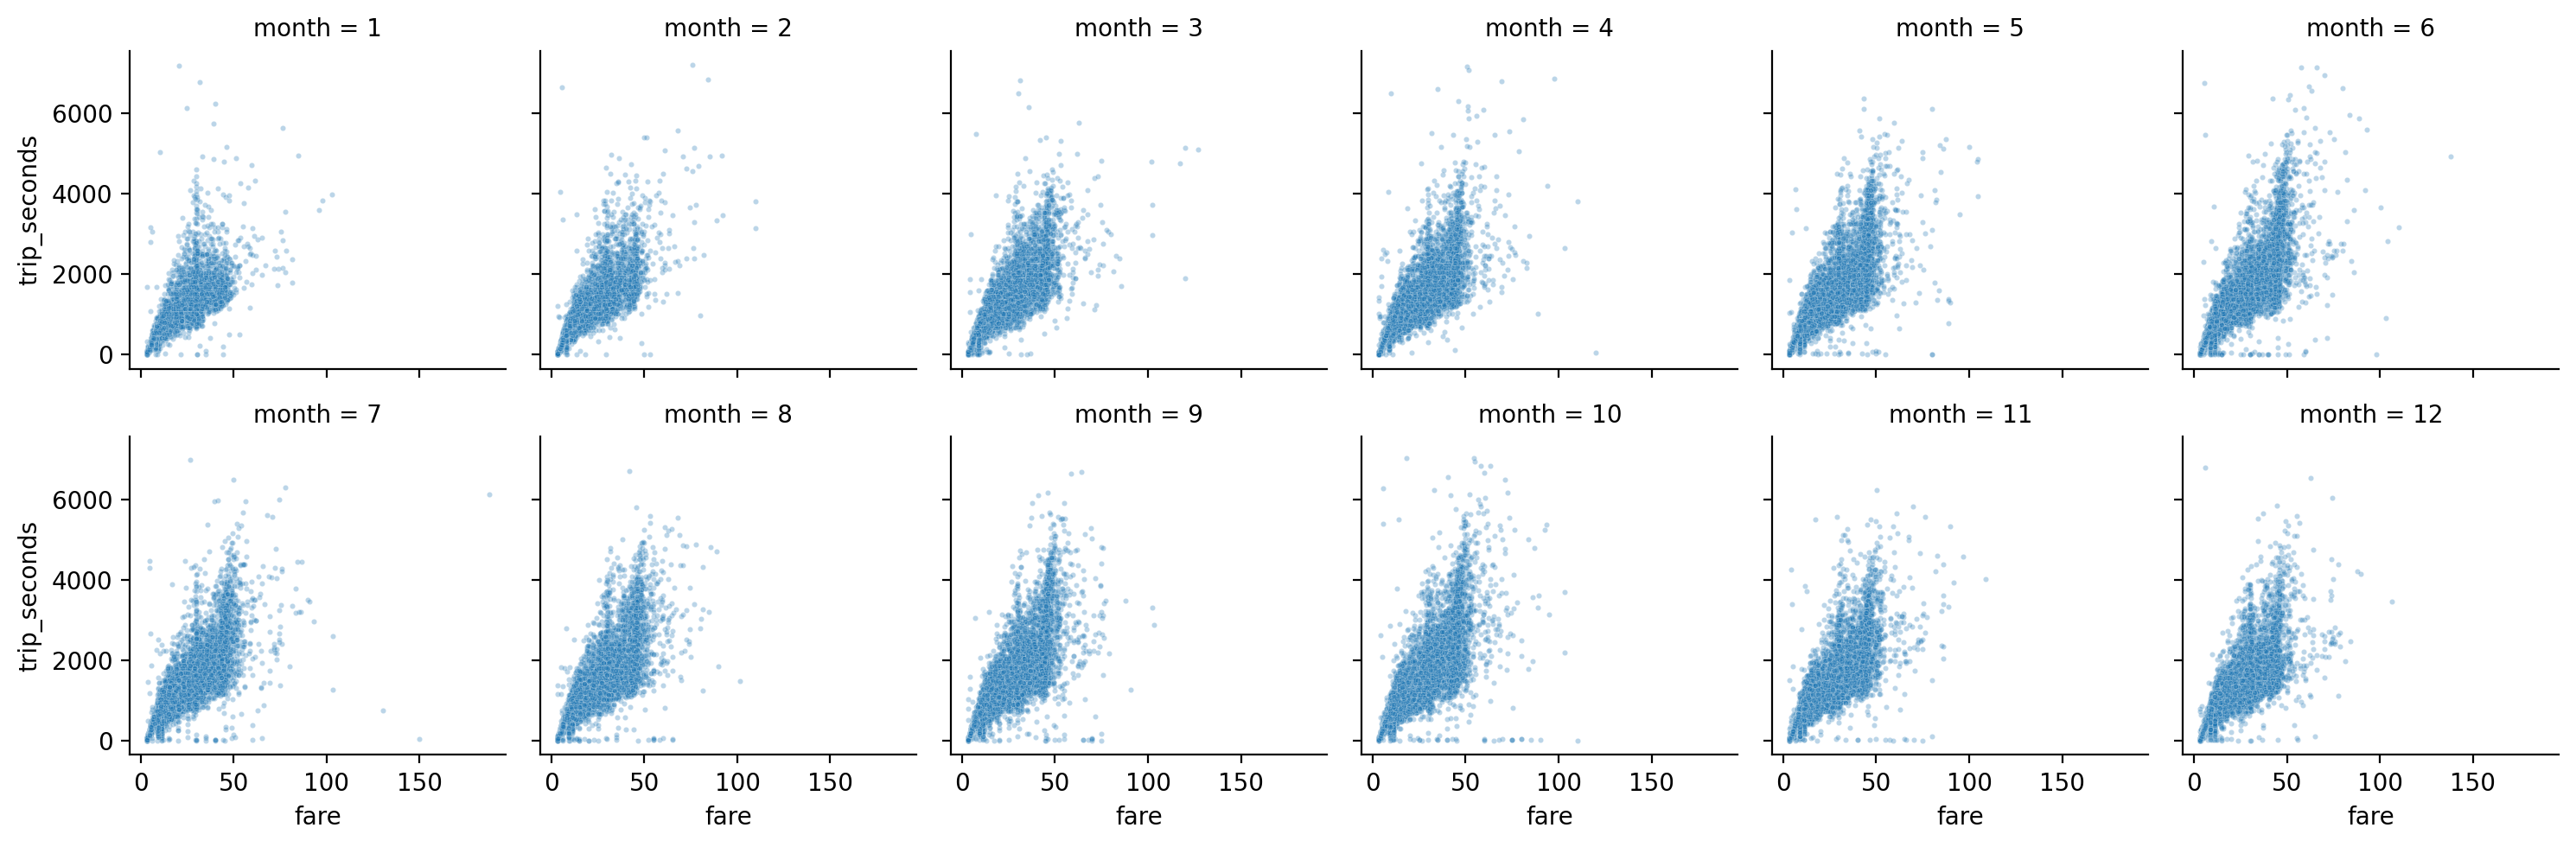

In [14]:
sns.relplot(df, x='fare', y='trip_seconds', col='month', col_wrap=6, height=2.5, alpha=0.3, s=5);

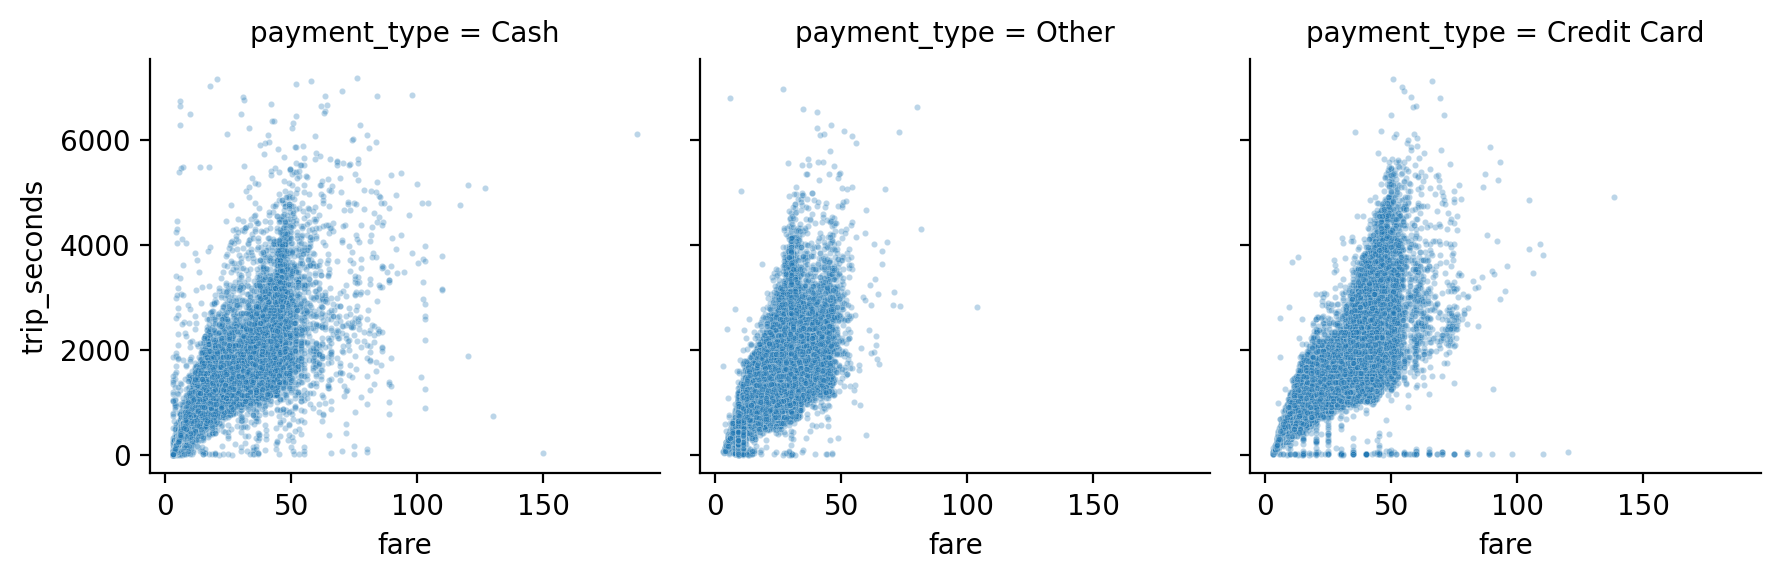

In [15]:
sns.relplot(df, x='fare', y='trip_seconds', col='payment_type', height=3, alpha=0.3, s=5);

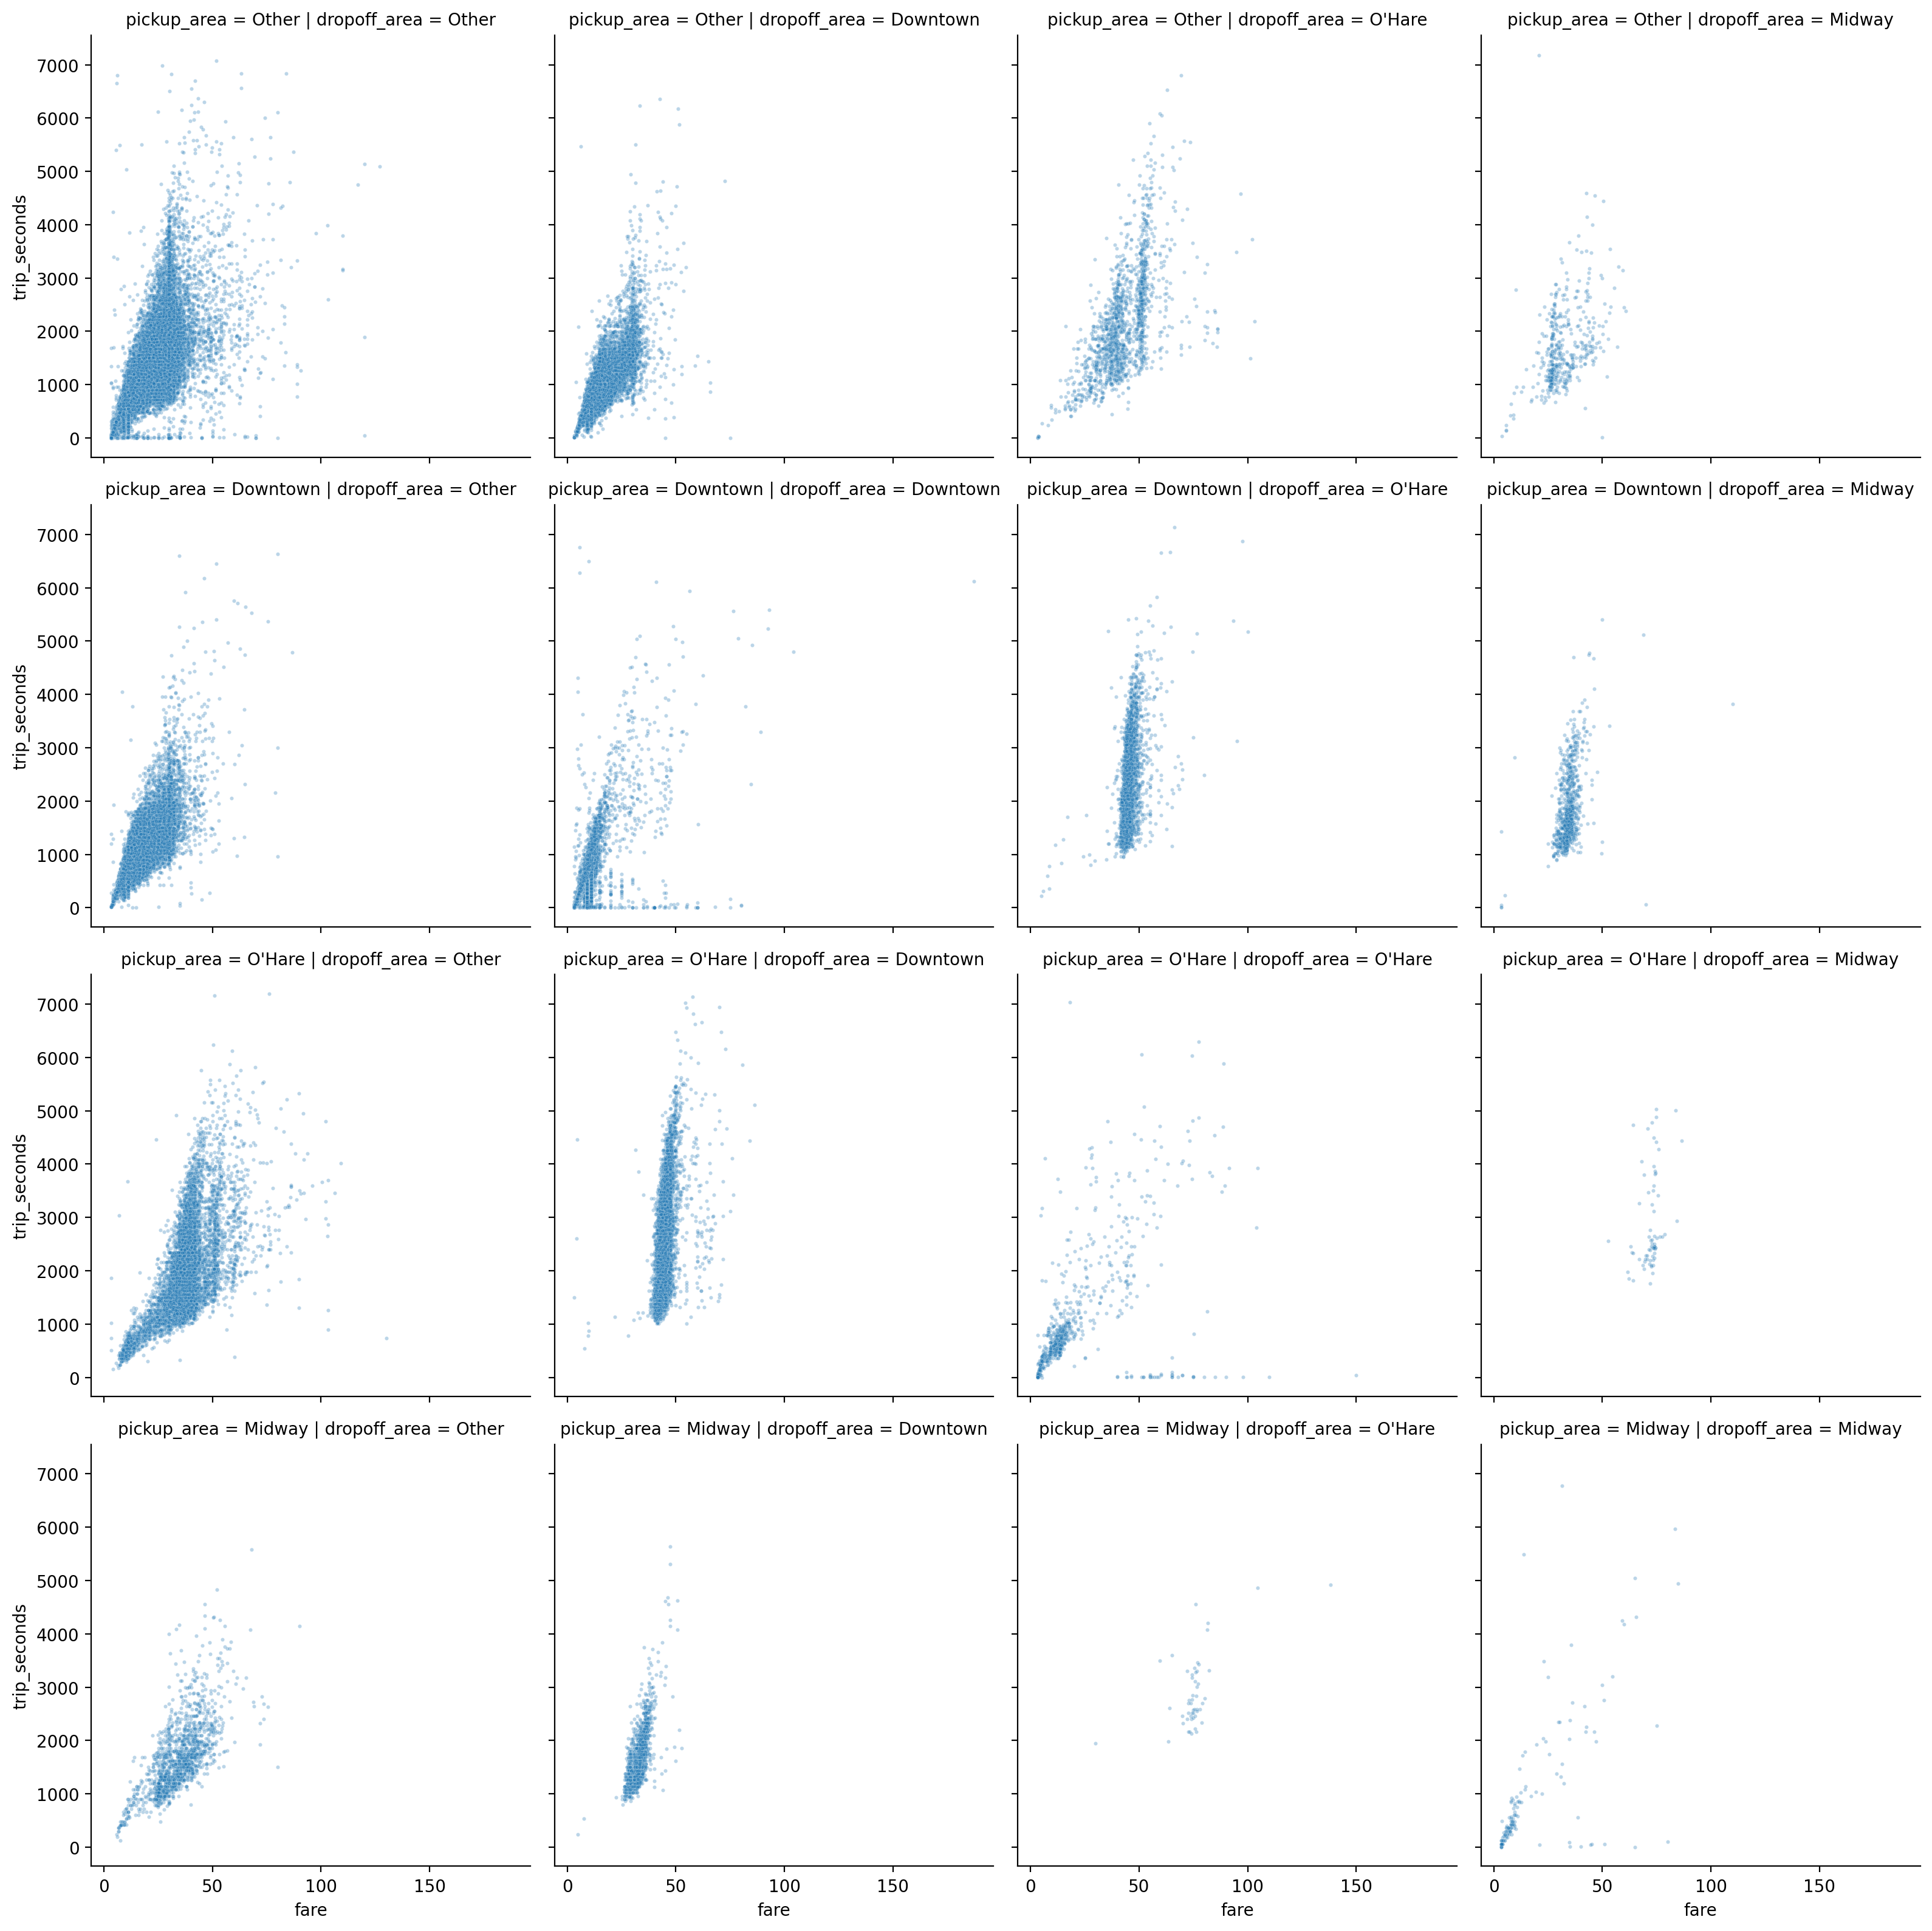

In [16]:
sns.relplot(df, x='fare', y='trip_seconds', row='pickup_area', col='dropoff_area', height=4, alpha=0.3, s=5);

In [17]:
# https://pandas.pydata.org/docs/user_guide/groupby.html
g = df.groupby(['pickup_area', 'dropoff_area'])[['trip_miles', 'trip_seconds', 'fare']]
df2 = pd.concat([g.size().rename('count'), g.mean()], axis=1) # https://pandas.pydata.org/docs/user_guide/advanced.html#advanced-hierarchical
df2['mph'] = df2['trip_miles'] / df2['trip_seconds'] * 3600
df2['$/mile'] = df2['fare'] /  df2['trip_miles']

df2.round(2)

count  trip_miles  trip_seconds   fare    mph  \
pickup_area dropoff_area                                                  
Downtown    Downtown      27193        1.28        498.11   7.72   9.22   
            Midway          905       11.89       1826.88  34.32  23.44   
            O'Hare         3399       16.85       2270.87  45.54  26.71   
            Other         17365        4.28        959.18  15.48  16.05   
Midway      Downtown       1377       10.87       1706.70  33.18  22.93   
            Midway          143        4.25       1012.29  18.12  15.12   
            O'Hare           51       28.16       2900.75  75.46  34.94   
            Other          1451       11.24       1664.48  34.08  24.32   
O'Hare      Downtown       7045       16.43       2438.40  44.89  24.26   
            Midway           72       26.56       2894.18  72.09  33.03   
            O'Hare          787        5.32       1038.42  20.51  18.43   
            Other          6821       13.19       1994.86  37.07  23.79   
Other       Downtown       9380        4.13        967.05  15.40  15.39   
            Midway          439       10.47       1694.26  31.92  22.25   
            O'Hare         1464       15.23       2195.36  43.00  24.97   
            Other         22108        5.62       1184.04  19.73  17.10   

                          $/mile  
pickup_area dropoff_area          
Downtown    Downtown        6.05  
            Midway          2.89  
            O'Hare          2.70  
            Other           3.62  
Midway      Downtown        3.05  
            Midway          4.26  
            O'Hare          2.68  
            Other           3.03  
O'Hare      Downtown        2.73  
            Midway          2.71  
            O'Hare          3.86  
            Other           2.81  
Other       Downtown        3.73  
            Midway          3.05  
            O'Hare          2.82  
            Other           3.51

# Step 5a: Simple linear regression
>**Model:** $(\text{trip seconds}) = 152.37 + 49.85\,(\text{fare})$

In [18]:
import statsmodels.formula.api as smf

model = smf.ols(formula='trip_seconds ~ fare', data=df).fit()
print(model.summary()) # https://www.statsmodels.org/stable/example_formulas.html

                            OLS Regression Results                            
Dep. Variable:           trip_seconds   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                 2.118e+05
Date:                Mon, 14 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:59:41   Log-Likelihood:            -7.6584e+05
No. Observations:              100000   AIC:                         1.532e+06
Df Residuals:                   99998   BIC:                         1.532e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.3703      2.718     56.056      0.0

In [19]:
model.params # See dir(model)

Intercept    152.370263
fare          49.853370
dtype: float64

In [20]:
model.rsquared, model.mse_resid # See dir(model)

(0.6792515574397406, 262739.2942218045)

In [21]:
# import patsy # https://patsy.readthedocs.io/en/latest/formulas.html#the-formula-language
import statsmodels.api as sm

x = sm.add_constant(df['fare'])
y = df['trip_seconds']
# y, x = patsy.dmatrices('trip_seconds ~ fare', data=df, return_type='dataframe')

print(sm.OLS(y, x).fit().summary()) # https://www.statsmodels.org/stable/regression.html

                            OLS Regression Results                            
Dep. Variable:           trip_seconds   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                 2.118e+05
Date:                Mon, 14 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:59:43   Log-Likelihood:            -7.6584e+05
No. Observations:              100000   AIC:                         1.532e+06
Df Residuals:                   99998   BIC:                         1.532e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.3703      2.718     56.056      0.0

In [22]:
import sklearn.linear_model # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

x = df[['fare']] # (n,1)-shape
y = df['trip_seconds'] # (n,)-shape
model = sklearn.linear_model.LinearRegression(fit_intercept=True).fit(x, y)

In [23]:
model.intercept_, model.coef_

(152.37026290623203, array([49.85336985]))

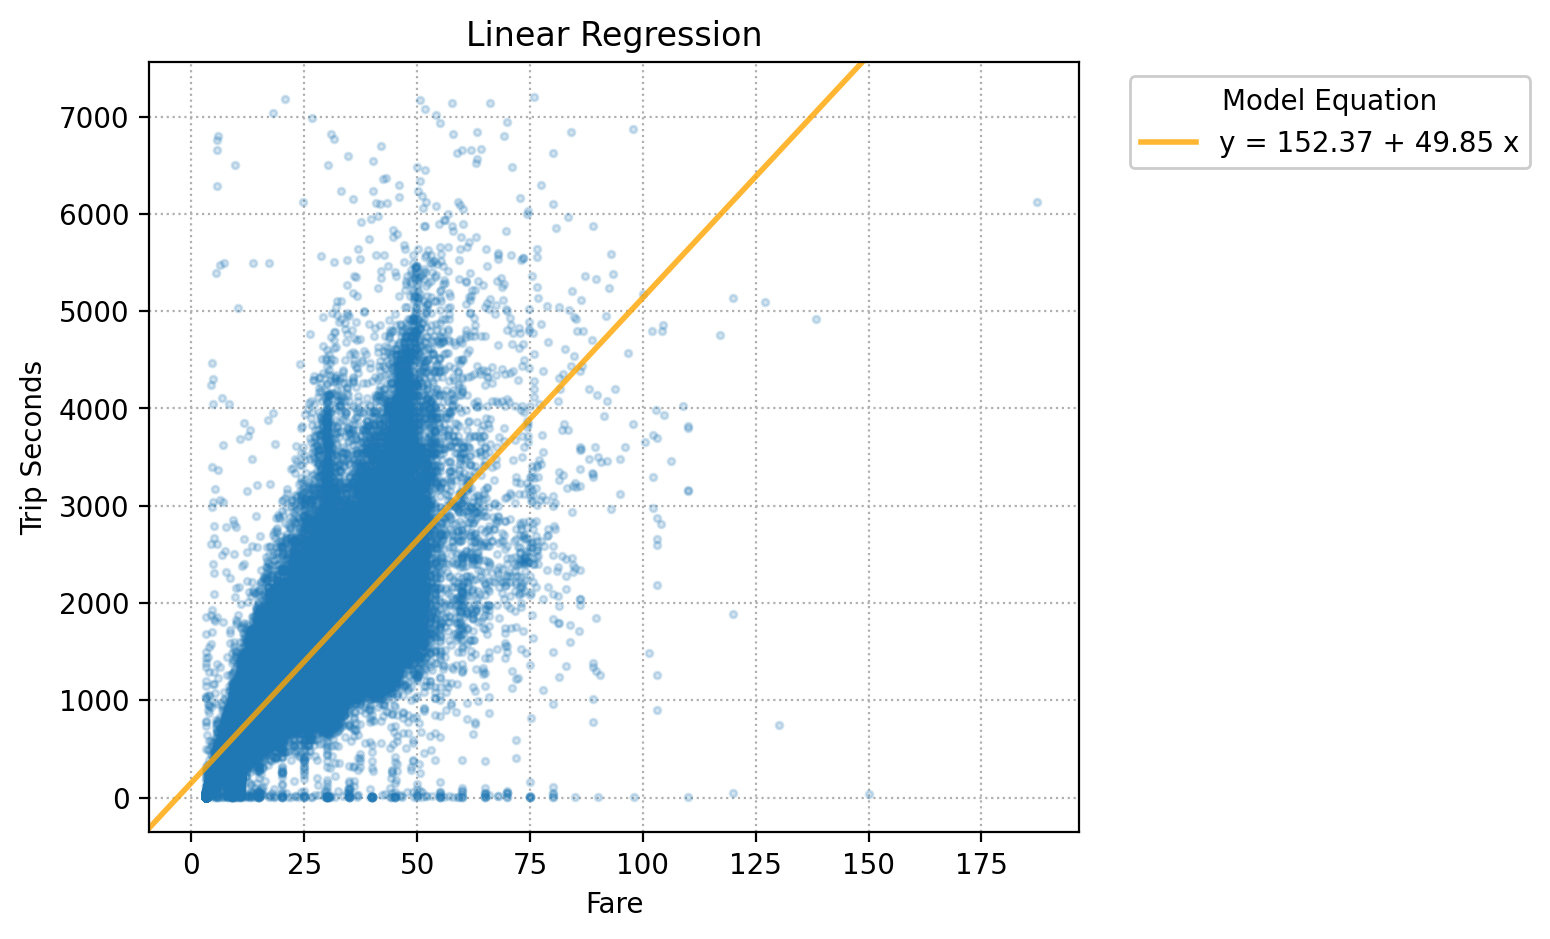

In [24]:
plt.figure(figsize=(6, 5))

plt.plot(df['fare'], df['trip_seconds'], '.', markersize=5, alpha=0.2)
plt.axline((0, model.intercept_), slope=model.coef_[0], linewidth=2, color='orange', alpha=0.8,
           label=f'y = {model.intercept_:.2f} + {model.coef_[0]:.2f} x')
plt.grid(linestyle=':')
plt.xlabel('Fare')
plt.ylabel('Trip Seconds')
plt.title('Linear Regression')
plt.legend(framealpha=1, bbox_to_anchor=(1.5, 1), title='Model Equation')
plt.show()

In [25]:
# Compute mean squared error MSE
import sklearn.metrics

y_pred = model.predict(x) # Fitted / predicted value
mse = np.mean((y - y_pred) ** 2)

(mse, 
 sklearn.metrics.mean_squared_error(y, y_pred)) # https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error

(262734.0394359199, 262734.0394359199)

In [26]:
# Compute root mean squared error RMSE
(np.sqrt(mse),
 sklearn.metrics.mean_squared_error(y, y_pred, squared=False))

C:\Users\Owner\miniconda3\envs\ml\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(512.5758865142993, 512.5758865142993)

In [27]:
# Compute various sums of squares
ss_reg = np.sum((y_pred - np.mean(y)) ** 2)
ss_error = np.sum((y - y_pred) ** 2)
ss_total = np.sum((y - np.mean(y)) ** 2) # SST = SSR + SSE

ss_reg, ss_error, ss_total

(55639398917.972015, 26273403943.591988, 81912802861.56337)

In [28]:
# Compute coefficient of determination R^2
(np.corrcoef(y, y_pred)[0,1] ** 2, # Corr(y, y_pred)
 ss_reg / ss_total, # SSR / SST
 1 - ss_error / ss_total, # 1 - SSE / SST
 model.score(x, y),
 sklearn.metrics.r2_score(y, y_pred))

(0.6792515574397511,
 0.6792515574397486,
 0.6792515574397409,
 0.6792515574397409,
 0.6792515574397409)

# Step 5b: Multiple linear regression
>**Model:** $(\text{trip seconds}) = 170.00 + 49.76\,(\text{fare}) - 118.31\,(\text{tips percent})$

In [29]:
print(smf.ols(formula='trip_seconds ~ fare + tips_percent', data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:           trip_seconds   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                 1.061e+05
Date:                Mon, 14 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:59:45   Log-Likelihood:            -7.6575e+05
No. Observations:              100000   AIC:                         1.532e+06
Df Residuals:                   99997   BIC:                         1.532e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      169.9954      3.034     56.037   

In [30]:
x = sm.add_constant(df[['fare', 'tips_percent']]) # Design matrix with a column of 1's for the intercept term
y = df['trip_seconds']

x.head(2)

const  fare  tips_percent
0    1.0  4.25           0.0
1    1.0  8.50           0.0

In [31]:
print(sm.OLS(y, x).fit().summary())

                            OLS Regression Results                            
Dep. Variable:           trip_seconds   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                 1.061e+05
Date:                Mon, 14 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:59:45   Log-Likelihood:            -7.6575e+05
No. Observations:              100000   AIC:                         1.532e+06
Df Residuals:                   99997   BIC:                         1.532e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          169.9954      3.034     56.037   

In [32]:
x = df[['fare', 'tips_percent']]
y = df['trip_seconds']
model = sklearn.linear_model.LinearRegression(fit_intercept=True).fit(x, y)

model.intercept_, model.coef_, model.score(x, y) # R^2

(169.9954024670086, array([  49.76145196, -118.30515646]), 0.6797960584655361)

# Step 6a: [Multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity) of explanatory variables
>**Model:** $(\text{trip seconds}) = 152.37 + 49.85\,(\text{fare})$

In [33]:
print(smf.ols(formula='trip_seconds ~ fare', data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:           trip_seconds   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                 2.118e+05
Date:                Mon, 14 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:59:45   Log-Likelihood:            -7.6584e+05
No. Observations:              100000   AIC:                         1.532e+06
Df Residuals:                   99998   BIC:                         1.532e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.3703      2.718     56.056      0.0

In [34]:
df2 = df[['trip_seconds', 'fare']].copy()
df2['fare_2'] = df2['fare'] * 2

df2.head(2)

trip_seconds  fare  fare_2
0           151  4.25     8.5
1           918  8.50    17.0

In [35]:
np.corrcoef(df2['fare'], df2['fare_2'])[0,1] # Corr(fare, 2 * fare) = 1

0.9999999999999999

>**Model:** $(\text{trip seconds}) = 152.37 + 
\beta_1\,(\text{fare}) + \beta_2\,(\text{fare} \times2)$

In [36]:
print(smf.ols(formula='trip_seconds ~ fare + fare_2', data=df2).fit().summary()) # Parameter estimation is very sensitive and non-unique

                            OLS Regression Results                            
Dep. Variable:           trip_seconds   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                 1.059e+05
Date:                Mon, 14 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:59:45   Log-Likelihood:            -7.6584e+05
No. Observations:              100000   AIC:                         1.532e+06
Df Residuals:                   99997   BIC:                         1.532e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.3703      2.718     56.056      0.0

In [37]:
# Fare and trip miles are highly correlated
np.corrcoef(df['fare'], df['trip_miles'])[0,1]

0.9031626773336406

>**Model:** $(\text{trip seconds}) = 520.45 + 103.91 (\text{trip miles})$

In [38]:
print(smf.ols(formula='trip_seconds ~ trip_miles', data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:           trip_seconds   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                 1.153e+05
Date:                Mon, 14 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:59:45   Log-Likelihood:            -7.8434e+05
No. Observations:              100000   AIC:                         1.569e+06
Df Residuals:                   99998   BIC:                         1.569e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    520.4517      2.704    192.486      0.0

>**Model:** $(\text{trip seconds}) = 136.71 + 53.55 (\text{fare}) - 9.61 (\text{trip miles})$

In [39]:
print(smf.ols(formula='trip_seconds ~ fare + trip_miles', data=df).fit().summary()) # Poor model explainability

                            OLS Regression Results                            
Dep. Variable:           trip_seconds   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                 1.063e+05
Date:                Mon, 14 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:59:46   Log-Likelihood:            -7.6571e+05
No. Observations:              100000   AIC:                         1.531e+06
Df Residuals:                   99997   BIC:                         1.531e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    136.7063      2.881     47.458      0.0

# Step 6b: [Variance inflation factor](https://en.wikipedia.org/wiki/Variance_inflation_factor) VIF

In [40]:
numerical_x_cols = list(set(numerical_cols) - {'trip_seconds'}) # Omit y

r2 = {}
for col in numerical_x_cols:
    x = df[numerical_x_cols].drop(col, axis='columns')
    y = df[col]
    model = sklearn.linear_model.LinearRegression(fit_intercept=True).fit(x, y)
    r2[col] = model.score(x, y) # R^2

pd.DataFrame.from_dict(r2, orient='index').rename(columns={0: 'r2'}).eval('vif = 1 / (1 - r2)')

r2          vif
fare          0.999512  2049.046456
tips          0.991980   124.692212
tolls         0.052419     1.055319
trip_miles    0.820697     5.577154
tips_percent  0.546423     2.204698
extras        0.971570    35.174672
trip_total    0.999677  3092.085515

In [41]:
import statsmodels.stats.outliers_influence

df2 = sm.add_constant(df[numerical_x_cols])

vif = {}
for i, col in enumerate(numerical_x_cols, 1):
    vif[col] = statsmodels.stats.outliers_influence.variance_inflation_factor(df2, i)

pd.DataFrame.from_dict(vif, orient='index').rename(columns={0: 'vif'})

vif
fare          2049.046456
tips           124.692212
tolls            1.055319
trip_miles       5.577154
tips_percent     2.204698
extras          35.174672
trip_total    3092.085515

# Step 7: [Polynomial regression](https://en.wikipedia.org/wiki/Polynomial_regression)
>**Model:** $(\text{trip seconds}) = -4.15 + 67.74\,(\text{fare}) - 0.32\,(\text{fare})^2$

In [42]:
model = smf.ols(formula='trip_seconds ~ fare + I(fare ** 2)', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           trip_seconds   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                 1.109e+05
Date:                Mon, 14 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:59:46   Log-Likelihood:            -7.6425e+05
No. Observations:              100000   AIC:                         1.529e+06
Df Residuals:                   99997   BIC:                         1.529e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -4.1469      3.839     -1.080   

In [43]:
# Create polynomial explanatory variables
import sklearn.preprocessing

def poly(x, p):
    x = np.asarray(x).reshape(-1, 1) # (n,1)-shape
    return sklearn.preprocessing.PolynomialFeatures(degree=p, include_bias=False).fit_transform(x) # (n,p)-shape

poly(np.arange(5), 3)

array([[ 0.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [44]:
x = poly(df['fare'], 2) # (n,2)-shape
y = df['trip_seconds'] # (n,)-shape
model = sklearn.linear_model.LinearRegression(fit_intercept=True).fit(x, y)

model.intercept_, model.coef_, model.score(x, y) # R^2

(-4.146885400887413, array([67.74437072, -0.32377666]), 0.6892919623507452)

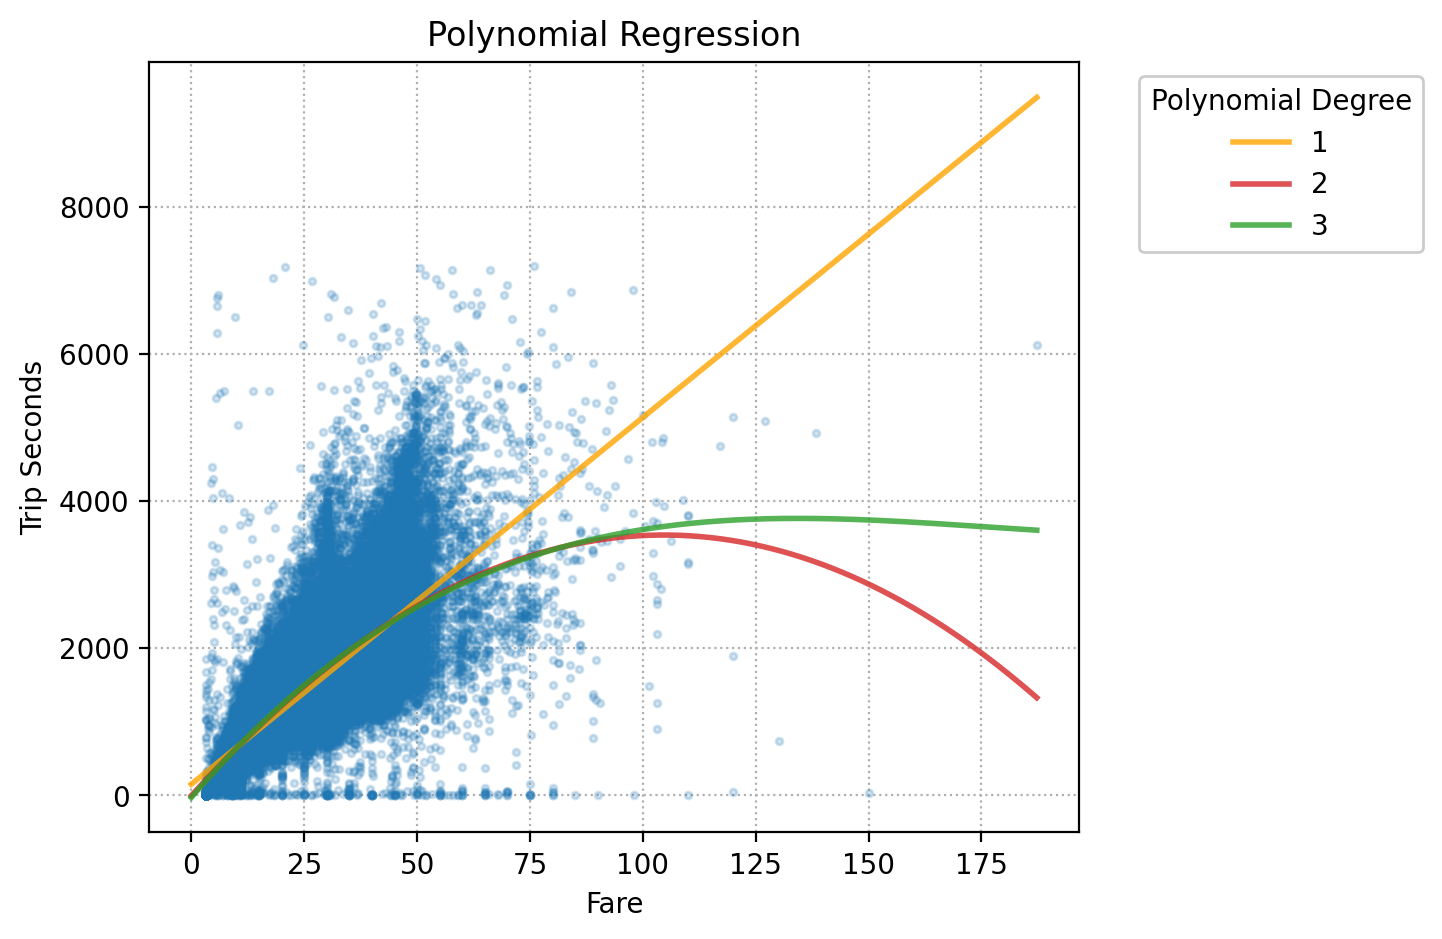

In [45]:
plt.figure(figsize=(6, 5))

plt.plot(df['fare'], df['trip_seconds'], '.', markersize=5, alpha=0.2)

xticks = np.linspace(0, df['fare'].max(), num=1000)
for p, color in zip([1, 2, 3], ['orange', 'C3', 'C2']):
    model = sklearn.linear_model.LinearRegression(fit_intercept=True).fit(poly(df['fare'], p), df['trip_seconds'])
    plt.plot(xticks, model.predict(poly(xticks, p)), linewidth=2, color=color, alpha=0.8, label=p)

plt.grid(linestyle=':')
plt.xlabel('Fare')
plt.ylabel('Trip Seconds')
plt.title('Polynomial Regression')
plt.legend(framealpha=1, bbox_to_anchor=(1.05, 1), title='Polynomial Degree')

plt.show()

# Step 8a: Binary / indicator categorical explanatory variable

In [46]:
df['night'] = ~df['hour'].between(7, 20) # Binary indicator variable

In [47]:
# Q: Distribution of "night" variable?
df['night'].value_counts() / df['night'].count()

night
False    0.82816
True     0.17184
Name: count, dtype: float64

>**Model:** $(\text{trip seconds}) = 200.48 + 50.28(\text{fare}) -330.35\times\mathbf{1}_{\{\text{night}\}}$

In [48]:
print(smf.ols(formula='trip_seconds ~ fare + night', data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:           trip_seconds   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                 1.156e+05
Date:                Mon, 14 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:59:47   Log-Likelihood:            -7.6280e+05
No. Observations:              100000   AIC:                         1.526e+06
Df Residuals:                   99997   BIC:                         1.526e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       200.4770      2.706     74.086

In [49]:
x = sm.add_constant(df[['fare', 'night']].astype(float)) # Convert night from True/False to 1/0 explicitly
y = df['trip_seconds']

print(sm.OLS(y, x).fit().summary())

                            OLS Regression Results                            
Dep. Variable:           trip_seconds   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                 1.156e+05
Date:                Mon, 14 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:59:47   Log-Likelihood:            -7.6280e+05
No. Observations:              100000   AIC:                         1.526e+06
Df Residuals:                   99997   BIC:                         1.526e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        200.4770      2.706     74.086      0.0

In [50]:
x = df[['fare', 'night']]
y = df['trip_seconds']
model = sklearn.linear_model.LinearRegression(fit_intercept=True).fit(x, y) # Convert night from True/False to 1/0 implicitly

model.intercept_, model.coef_, model.score(x, y) # R^2

(200.47697447924736, array([  50.28332334, -330.34513323]), 0.6981603461041886)

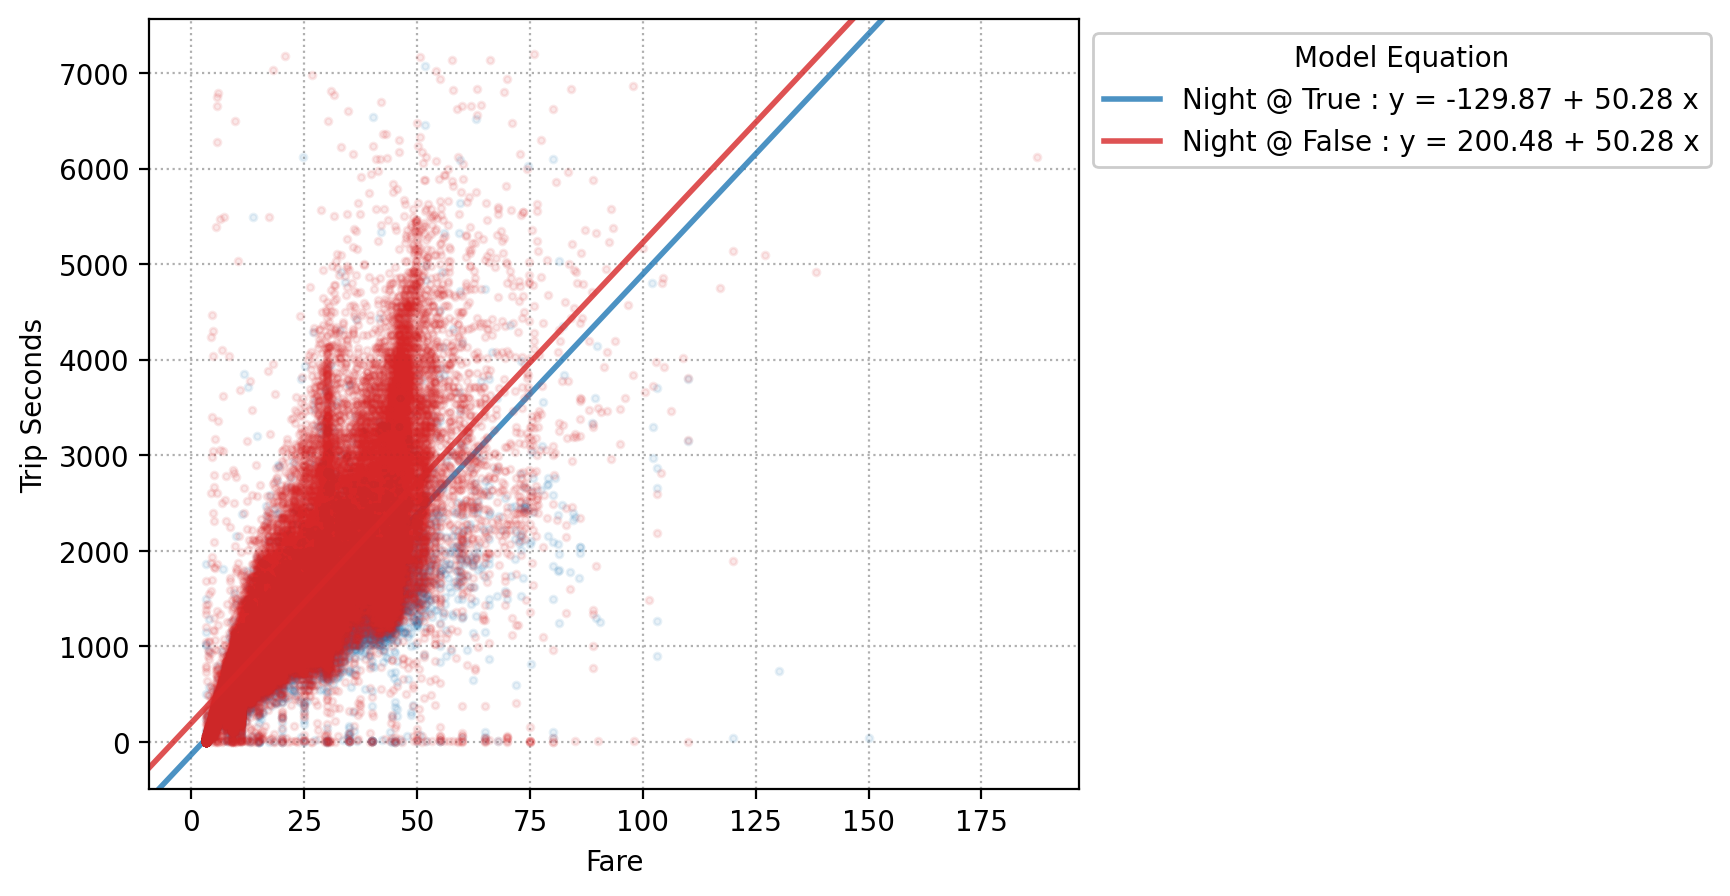

In [51]:
plt.figure(figsize=(6, 5))

is_night = df['night']

b0 = model.intercept_ + model.coef_[1]
b1 = model.coef_[0]
plt.plot(df['fare'][is_night], df['trip_seconds'][is_night], '.', markersize=5, alpha=0.1, color='C0')
plt.axline((0, b0), slope=b1, linewidth=2, color='C0', alpha=0.8, label=f'Night @ True : y = {b0:.2f} + {b1:.2f} x')

b0 = model.intercept_
b1 = model.coef_[0]
plt.plot(df['fare'][~is_night], df['trip_seconds'][~is_night], '.', markersize=5, alpha=0.1, color='C3')
plt.axline((0, b0), slope=b1, linewidth=2, color='C3', alpha=0.8, label=f'Night @ False : y = {b0:.2f} + {b1:.2f} x')

plt.grid(linestyle=':')
plt.xlabel('Fare')
plt.ylabel('Trip Seconds')
plt.legend(framealpha=1, bbox_to_anchor=(1, 1), title='Model Equation')

plt.show()

# Step 8b: One-hot encoding / dummy explanatory variable

In [52]:
hour_type = {'Rush Hour': {7, 8, 9, 15, 16, 17, 18},
             'Night': {0, 1, 2, 3, 4, 5, 6, 21, 22, 23},
             'Other': {10, 11, 12, 13, 14, 19, 20}}
df['hour_type'] = pd.Series(data='', index=df.index)
for type, hours in hour_type.items():
    df.loc[df['hour'].isin(hours), 'hour_type'] = type

df.head(2)

trip_id taxi_id  month  day_of_week  hour pickup_area dropoff_area  \
0  259f9c40ef9  f9bc93      1            5     0       Other        Other   
1  0f61207c6d8  271cde      1            5     0    Downtown        Other   

   trip_miles  trip_seconds  fare  tips  tips_percent  tolls  extras  \
0        0.35           151  4.25   0.0           0.0    0.0     1.0   
1        0.53           918  8.50   0.0           0.0    0.0     0.0   

   trip_total payment_type       company  night hour_type  
0        5.25         Cash  City Service   True     Night  
1        8.50         Cash      Sun Taxi   True     Night

In [53]:
# Q: Distribution of "hour_type" variable?
df['hour_type'].value_counts() / df['hour_type'].count()

hour_type
Other        0.42043
Rush Hour    0.40773
Night        0.17184
Name: count, dtype: float64

In [54]:
# Before one-hot encoding
df[['trip_seconds', 'fare', 'hour_type']].head(2)

trip_seconds  fare hour_type
0           151  4.25     Night
1           918  8.50     Night

>**Model:** $(\text{trip seconds}) = b_0 + b_1(\text{fare}) + b_2\times\mathbf{1}_{\{\text{hour type = Night}\}} + b_3\times\mathbf{1}_{\{\text{hour type = Other}\}} + b_4\times\mathbf{1}_{\{\text{hour type = Rush Hour}\}}$

In [55]:
# After one-hot encoding
pd.get_dummies(df[['trip_seconds', 'fare', 'hour_type']], columns=['hour_type']).head(2)

trip_seconds  fare  hour_type_Night  hour_type_Other  hour_type_Rush Hour
0           151  4.25             True            False                False
1           918  8.50             True            False                False

>**Model:** $(\text{trip seconds}) = -132.38 + 50.40(\text{fare}) + 260.27\times\mathbf{1}_{\{\text{hour type = Other}\}} + 403.08\times\mathbf{1}_{\{\text{hour type = Rush Hour}\}}$

In [56]:
# Method 1: Omit one level of the one-hot encoding
print(smf.ols(formula='trip_seconds ~ fare + hour_type', data=df).fit().summary()) # Drop first level implicitly

                            OLS Regression Results                            
Dep. Variable:           trip_seconds   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                 7.901e+04
Date:                Mon, 14 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:59:48   Log-Likelihood:            -7.6194e+05
No. Observations:              100000   AIC:                         1.524e+06
Df Residuals:                   99996   BIC:                         1.524e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -132

In [57]:
df2 = pd.get_dummies(df[['trip_seconds', 'fare', 'hour_type']], columns=['hour_type'], drop_first=True) # Drop first level

x = df2[['fare', 'hour_type_Other', 'hour_type_Rush Hour']]
y = df2['trip_seconds']
model = sklearn.linear_model.LinearRegression(fit_intercept=True).fit(x, y) # Has intercept

model.intercept_, model.coef_, model.score(x, y) # R^2

(-132.38326962258952,
 array([ 50.39850078, 260.27280843, 403.07905532]),
 0.7033101407066042)

>**Model:** $(\text{trip seconds}) = 0 + 50.40 (\text{fare}) - 132.38 \times\mathbf{1}_{\{\text{hour type = Night}\}} + 127.89 \times\mathbf{1}_{\{\text{hour type = Other}\}} + 270.70 \times\mathbf{1}_{\{\text{hour type = Rush Hour}\}}$

In [58]:
# Method 2: Keep all levels of the one-hot encoding but omit the intercept term
print(smf.ols(formula='trip_seconds ~ 0 + fare + hour_type', data=df).fit().summary())
# https://stat.ethz.ch/R-manual/R-devel/library/stats/html/formula.html

                            OLS Regression Results                            
Dep. Variable:           trip_seconds   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                 7.901e+04
Date:                Mon, 14 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:59:49   Log-Likelihood:            -7.6194e+05
No. Observations:              100000   AIC:                         1.524e+06
Df Residuals:                   99996   BIC:                         1.524e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
hour_type[Night]      -132.3833 

In [59]:
df2 = pd.get_dummies(df[['trip_seconds', 'fare', 'hour_type']], columns=['hour_type']) # Don't drop any level

x = df2[['fare', 'hour_type_Night', 'hour_type_Other', 'hour_type_Rush Hour']]
y = df2['trip_seconds']
model = sklearn.linear_model.LinearRegression(fit_intercept=False).fit(x, y) # No intercept

model.intercept_, model.coef_, model.score(x, y) # R^2

(0.0,
 array([  50.39850078, -132.38326962,  127.88953881,  270.6957857 ]),
 0.7033101407066042)

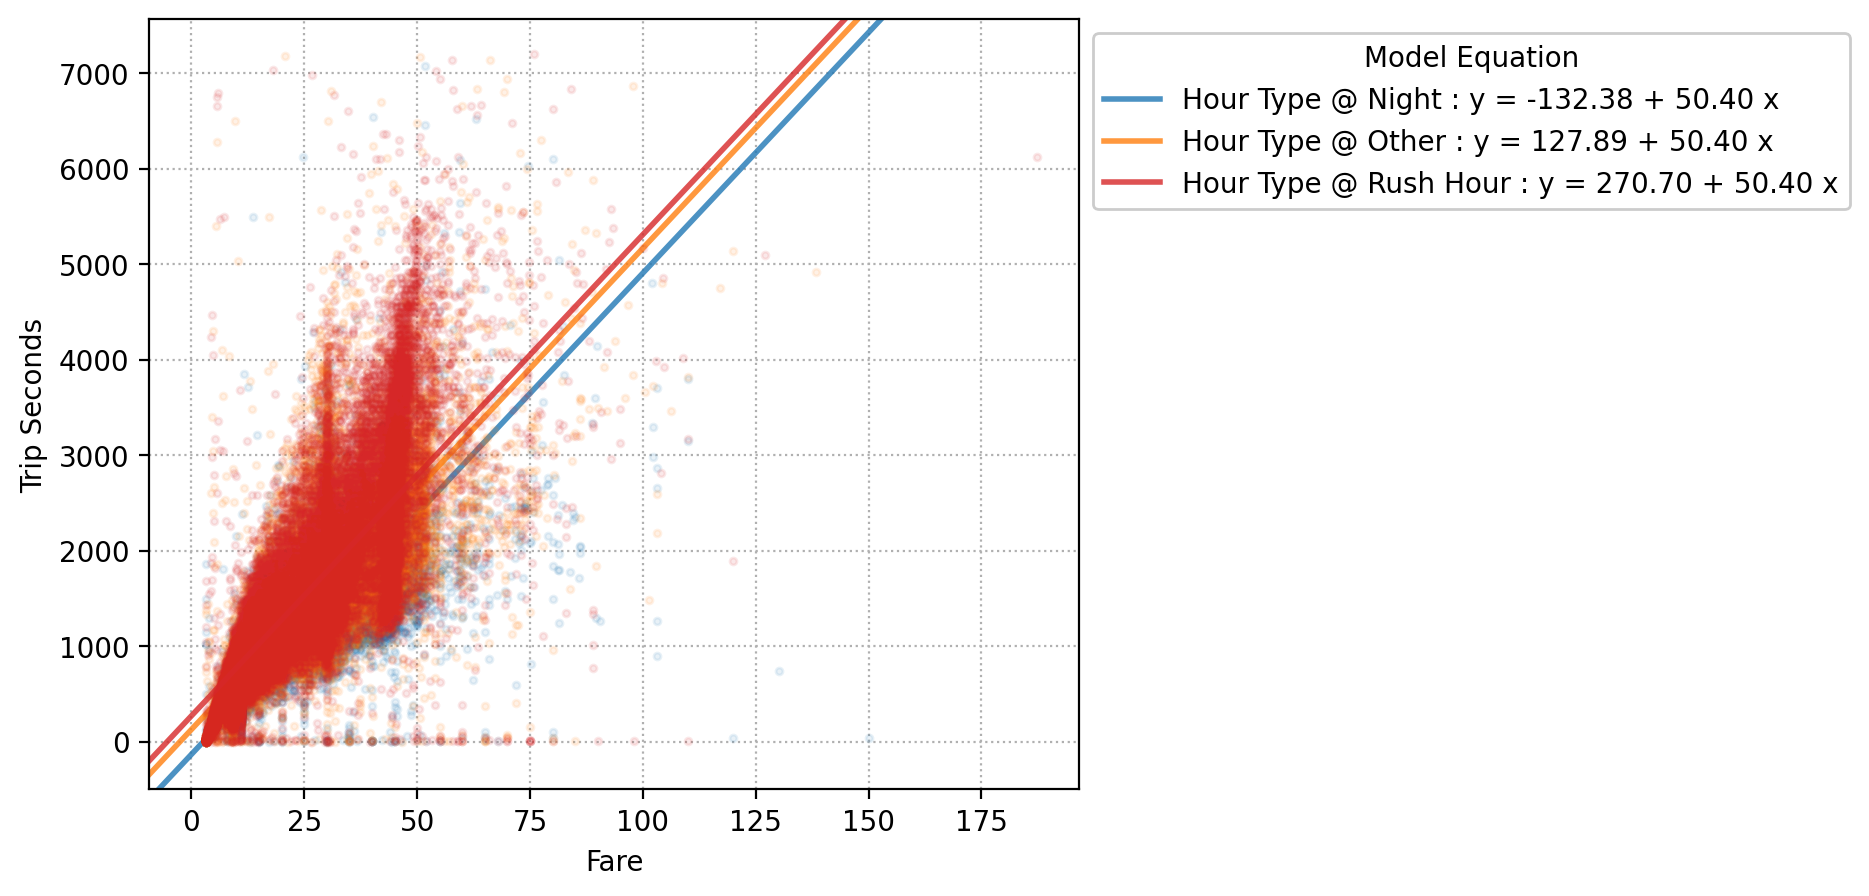

In [60]:
plt.figure(figsize=(6, 5))

for i, (type, color) in enumerate(zip(['Night', 'Other', 'Rush Hour'], ['C0', 'C1', 'C3']), 1):
    is_type = df['hour_type'] == type
    b0 = model.coef_[i]
    b1 = model.coef_[0]
    plt.plot(df['fare'][is_type], df['trip_seconds'][is_type], '.', markersize=5, alpha=0.1, color=color)
    plt.axline((0, b0), slope=b1, linewidth=2, color=color, alpha=0.8, label=f'Hour Type @ {type} : y = {b0:.2f} + {b1:.2f} x')

plt.grid(linestyle=':')
plt.xlabel('Fare')
plt.ylabel('Trip Seconds')
plt.legend(framealpha=1, bbox_to_anchor=(1, 1), title='Model Equation')

plt.show()

# Step 8c: Interaction term
>**Model:**$$\begin{align}(\text{trip seconds}) &=128.67 + 53.91(\text{fare}) + 119.65 \times\mathbf{1}_{\{\text{night}\}} - 20.95 (\text{fare})\mathbf{1}_{\{\text{night}\}}\\
&= (128.67 + 119.65 \times\mathbf{1}_{\{\text{night}\}}) + (53.91 - 20.95 \times\mathbf{1}_{\{\text{night}\}})(\text{fare})\end{align}$$

In [61]:
print(smf.ols(formula='trip_seconds ~ fare + night + fare:night', data=df).fit().summary()) # Same as 'trip_seconds ~ fare * night'

                            OLS Regression Results                            
Dep. Variable:           trip_seconds   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                 8.374e+04
Date:                Mon, 14 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:59:50   Log-Likelihood:            -7.5988e+05
No. Observations:              100000   AIC:                         1.520e+06
Df Residuals:                   99996   BIC:                         1.520e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            128.6740      2

In [62]:
x = df[['fare', 'night']].copy()
x['fare:night'] = x['fare'] * x['night'] # Interaction term

y = df['trip_seconds']
model = sklearn.linear_model.LinearRegression(fit_intercept=True).fit(x, y) # Convert night from True/False to 1/0 implicitly

model.intercept_, model.coef_, model.score(x, y) # R^2

(128.67395966422077,
 array([ 53.91167894, 119.65237512, -20.94746187]),
 0.715288796637269)

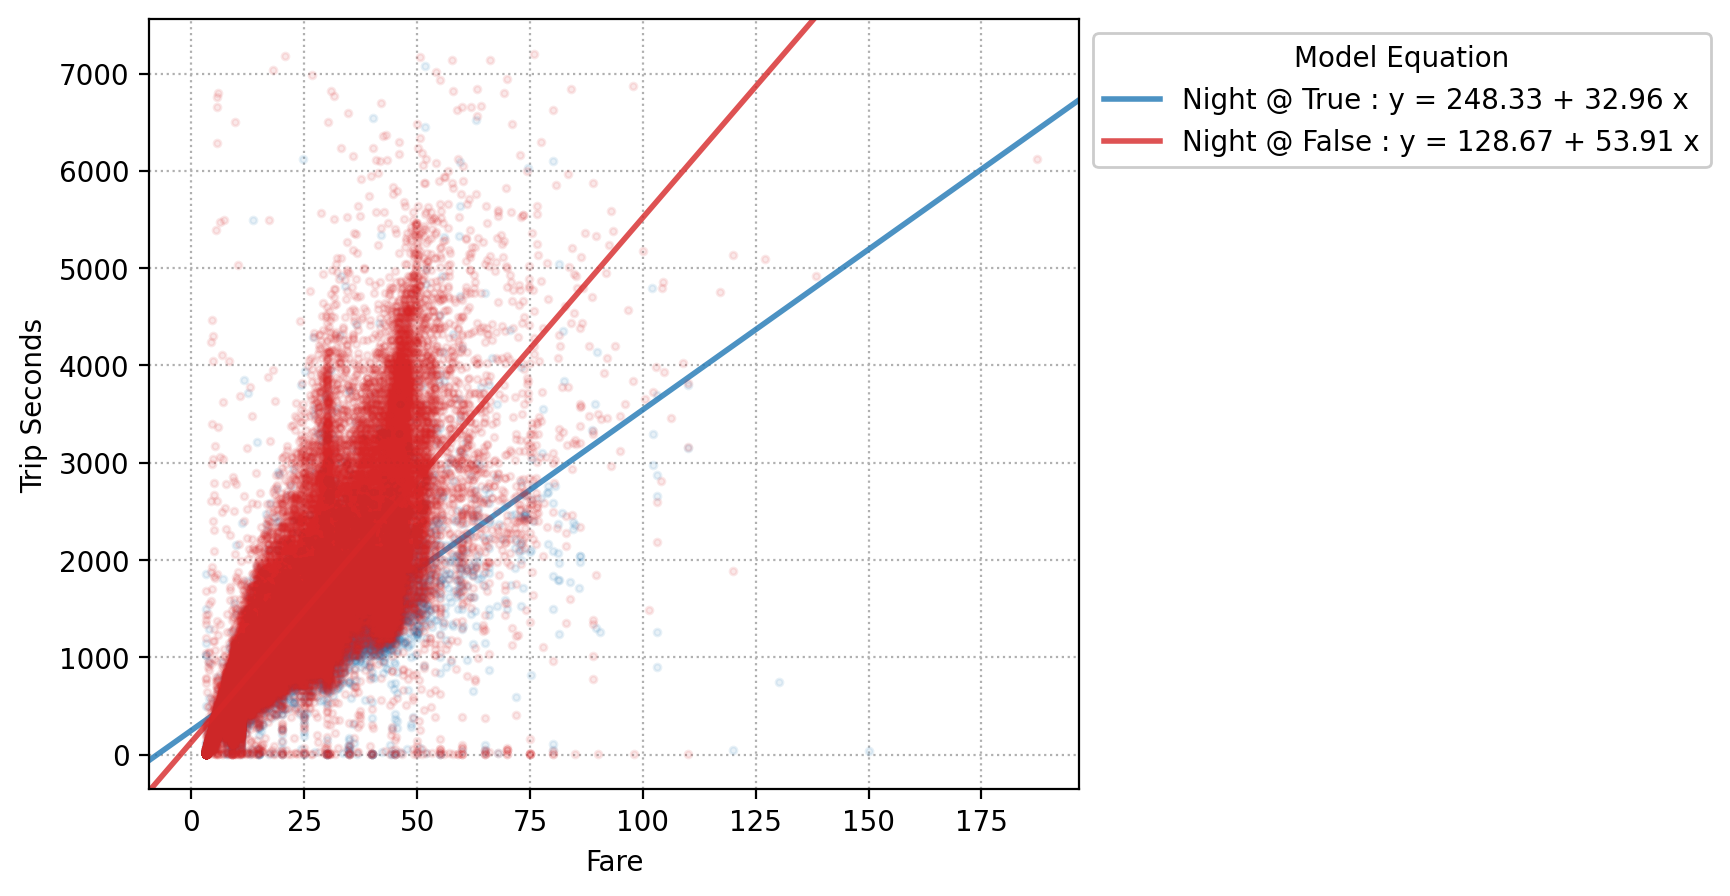

In [63]:
plt.figure(figsize=(6, 5))

is_night = df['night']

b0 = model.intercept_ + model.coef_[1]
b1 = model.coef_[0] + model.coef_[2]
plt.plot(df['fare'][is_night], df['trip_seconds'][is_night], '.', markersize=5, alpha=0.1, color='C0')
plt.axline((0, b0), slope=b1, linewidth=2, color='C0', alpha=0.8,
           label=f'Night @ True : y = {b0:.2f} + {b1:.2f} x')

b0 = model.intercept_
b1 = model.coef_[0]
plt.plot(df['fare'][~is_night], df['trip_seconds'][~is_night], '.', markersize=5, alpha=0.1, color='C3')
plt.axline((0, b0), slope=b1, linewidth=2, color='C3', alpha=0.8, label=f'Night @ False : y = {b0:.2f} + {b1:.2f} x')

plt.grid(linestyle=':')
plt.xlabel('Fare')
plt.ylabel('Trip Seconds')
plt.legend(framealpha=1, bbox_to_anchor=(1, 1), title='Model Equation')

plt.show()

>**Model:** $$\begin{align}(\text{trip seconds}) =&\; 248.33 + 32.97 (\text{fare}) - 81.86 \times \mathbf{1}_{\{\text{hour type = Other}\}} - 162.76 \times\mathbf{1}_{\{\text{hour type = Rush Hour}\}}\\ &+ 15.52 (\text{fare})\mathbf{1}_{\{\text{hour type = Other}\}} + 27.00 (\text{fare})\mathbf{1}_{\{\text{hour type = Rush Hour}\}}\\ = &\;(248.33 - 81.86 \times \mathbf{1}_{\{\text{hour type = Other}\}} - 162.76 \times\mathbf{1}_{\{\text{hour type = Rush Hour}\}} )\\  &+  (32.97 + 15.52\times \mathbf{1}_{\{\text{hour type = Other}\}} + 27.00 \times \mathbf{1}_{\{\text{hour type = Rush Hour}\}}) (\text{fare})\end{align}$$

In [64]:
# Method 1: Omit one level of the one-hot encoding
print(smf.ols(formula='trip_seconds ~ fare + hour_type + fare:hour_type', data=df).fit().summary()) # Same as 'trip_seconds ~ fare * hour_type'

                            OLS Regression Results                            
Dep. Variable:           trip_seconds   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                 5.355e+04
Date:                Mon, 14 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:59:52   Log-Likelihood:            -7.5758e+05
No. Observations:              100000   AIC:                         1.515e+06
Df Residuals:                   99994   BIC:                         1.515e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [65]:
df2 = pd.get_dummies(df[['trip_seconds', 'fare', 'hour_type']], columns=['hour_type'], drop_first=True)
for col in ['hour_type_Other', 'hour_type_Rush Hour']:
    df2[f'fare:{col}'] = df2['fare'] * df2[col]

x = df2[['fare', 'hour_type_Other', 'hour_type_Rush Hour', 'fare:hour_type_Other', 'fare:hour_type_Rush Hour']]
y = df2['trip_seconds']
model = sklearn.linear_model.LinearRegression(fit_intercept=True).fit(x, y)

model.intercept_, model.coef_, model.score(x, y) # R^2

(248.32633478179253,
 array([  32.96421707,  -81.8632733 , -162.75614208,   15.52637726,
          27.00260763]),
 0.7280767538071391)

>**Model:** $$\begin{align}(\text{trip seconds}) =&\; 248.33 \times \mathbf{1}_{\{\text{hour type = Night}\}} + 166.46 \times \mathbf{1}_{\{\text{hour type = Other}\}} + 85.57 \times \mathbf{1}_{\{\text{hour type = Rush Hour}\}} \\ &+ 32.96 (\text{fare})\mathbf{1}_{\{\text{hour type = Night}\}} + 48.49 (\text{fare})\mathbf{1}_{\{\text{hour type = Other}\}} + 59.97 (\text{fare})\mathbf{1}_{\{\text{hour type = Rush Hour}\}}\\ =&\; (248.33 + 32.96(\text{fare}))\times \mathbf{1}_{\{\text{hour type = Night}\}} \\ &+(166.46 + 48.49(\text{fare}))\times \mathbf{1}_{\{\text{hour type = Other}\}}\\ &+(85.57 + 59.97(\text{fare}))\times \mathbf{1}_{\{\text{hour type = Rush HOur}\}}\end{align}$$

In [66]:
# Method 2: Keep all levels of the one-hot encoding but omit the intercept and fare terms
print(smf.ols(formula='trip_seconds ~ 0 + hour_type + fare:hour_type', data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:           trip_seconds   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                 5.355e+04
Date:                Mon, 14 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:59:52   Log-Likelihood:            -7.5758e+05
No. Observations:              100000   AIC:                         1.515e+06
Df Residuals:                   99994   BIC:                         1.515e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
hour_type[Night]      

In [67]:
df2 = pd.get_dummies(df[['trip_seconds', 'fare', 'hour_type']], columns=['hour_type'])
for col in ['hour_type_Night', 'hour_type_Other', 'hour_type_Rush Hour']:
    df2[f'fare:{col}'] = df2['fare'] * df2[col]

x = df2[['hour_type_Night', 'hour_type_Other', 'hour_type_Rush Hour',
         'fare:hour_type_Night', 'fare:hour_type_Other', 'fare:hour_type_Rush Hour']]
y = df2['trip_seconds']
model = sklearn.linear_model.LinearRegression(fit_intercept=False).fit(x, y)

model.intercept_, model.coef_, model.score(x, y) # R^2

(0.0,
 array([248.32633478, 166.46306149,  85.5701927 ,  32.96421707,
         48.49059434,  59.9668247 ]),
 0.7280767538071391)

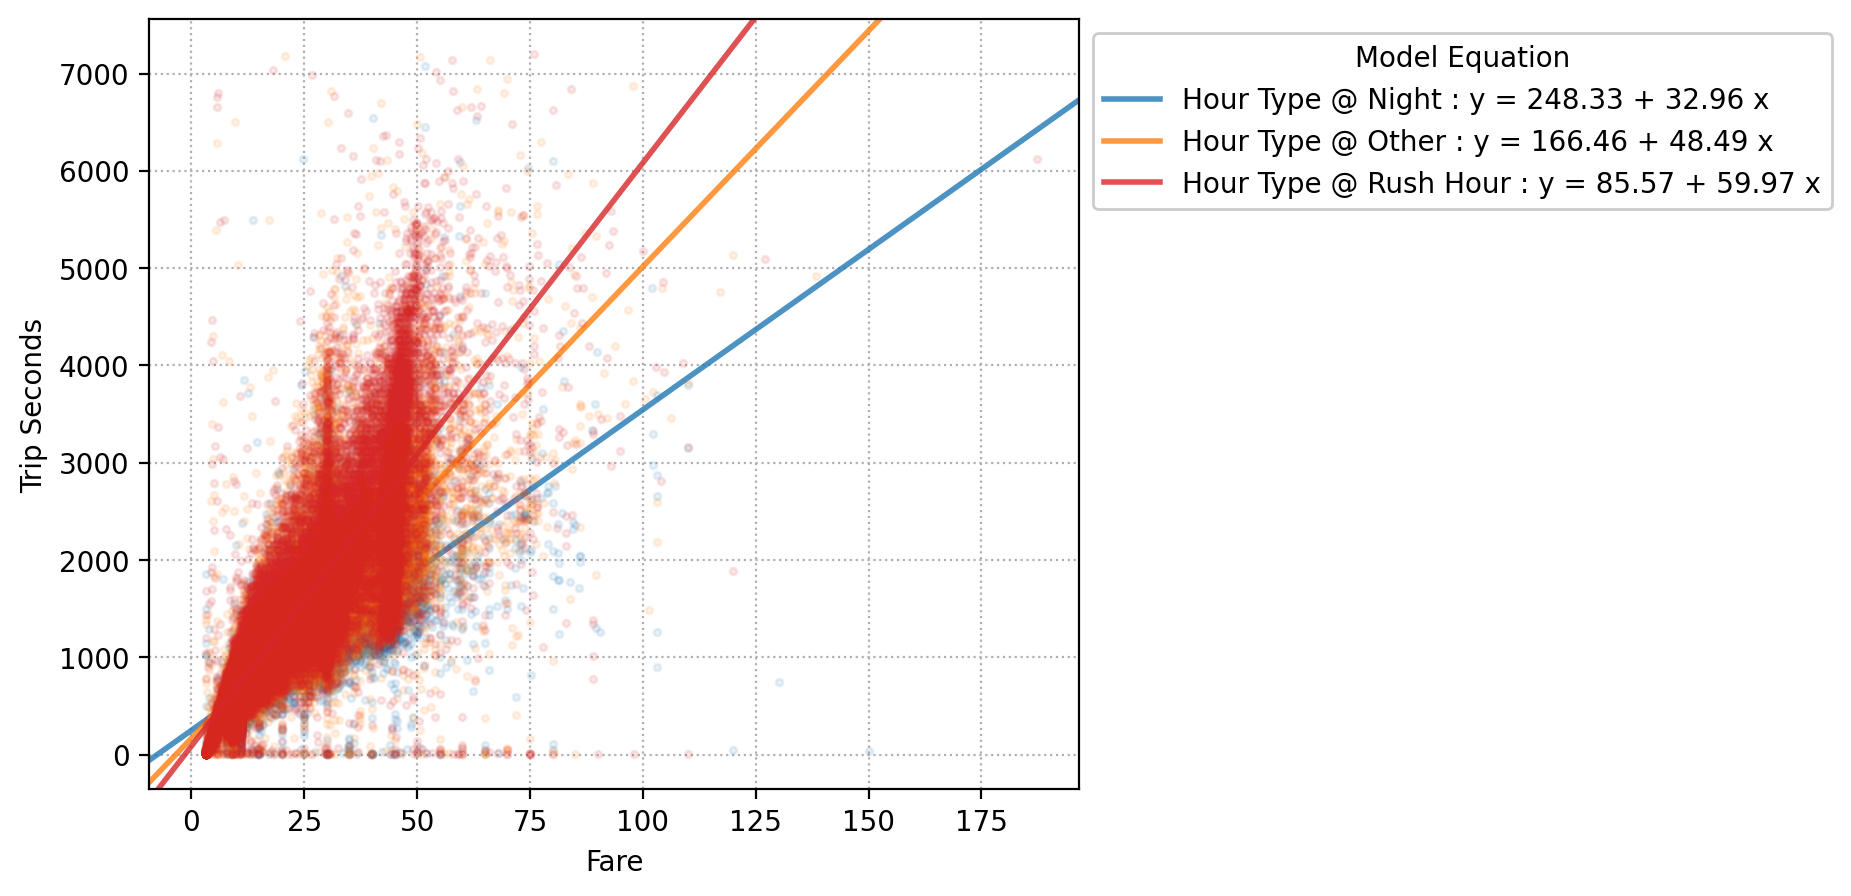

In [68]:
plt.figure(figsize=(6, 5))

for i, (type, color) in enumerate(zip(['Night', 'Other', 'Rush Hour'], ['C0', 'C1', 'C3'])):
    is_type = df['hour_type'] == type
    b0 = model.coef_[i]
    b1 = model.coef_[3 + i]
    plt.plot(df['fare'][is_type], df['trip_seconds'][is_type], '.', markersize=5, alpha=0.1, color=color)
    plt.axline((0, b0), slope=b1, linewidth=2, color=color, alpha=0.8, label=f'Hour Type @ {type} : y = {b0:.2f} + {b1:.2f} x')

plt.grid(linestyle=':')
plt.xlabel('Fare')
plt.ylabel('Trip Seconds')
plt.legend(framealpha=1, bbox_to_anchor=(1, 1), title='Model Equation')

plt.show()